In [330]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [331]:


# Read the CSV file with a custom separator
df = pd.read_csv('Normal_CPU_M2M_3D.csv',sep=';')

df.shape

(2161, 2)

In [332]:
df.head

<bound method NDFrame.head of                   Time  CPU Used
0     23/06/2023 12:00      1.75
1     23/06/2023 12:02     18.80
2     23/06/2023 12:04     16.20
3     23/06/2023 12:06     20.70
4     23/06/2023 12:08     18.80
...                ...       ...
2156  26/06/2023 11:52     12.20
2157  26/06/2023 11:54     12.80
2158  26/06/2023 11:56     16.10
2159  26/06/2023 11:58     14.10
2160  26/06/2023 12:00      1.49

[2161 rows x 2 columns]>

In [333]:
df.tail()

,Time,CPU Used
2156,26/06/2023 11:52,12.20
2157,26/06/2023 11:54,12.80
2158,26/06/2023 11:56,16.10
2159,26/06/2023 11:58,14.10
2160,26/06/2023 12:00,1.49


In [334]:
df['timestemp']=df['Time']

df['CPU_used']=df['CPU Used']
df=df.drop(columns=['Time','CPU Used'],axis=1)
df.head()
#df['timestemp']['06/07/2023 12:00':'13/07/2023 12:00']


,timestemp,CPU_used
0,23/06/2023 12:00,1.75
1,23/06/2023 12:02,18.80
2,23/06/2023 12:04,16.20
3,23/06/2023 12:06,20.70
4,23/06/2023 12:08,18.80


In [335]:
df=df.dropna(how='any')

In [336]:
df.shape

(2161, 2)

In [337]:
df.tail()

,timestemp,CPU_used
2156,26/06/2023 11:52,12.20
2157,26/06/2023 11:54,12.80
2158,26/06/2023 11:56,16.10
2159,26/06/2023 11:58,14.10
2160,26/06/2023 12:00,1.49


<Axes: xlabel='timestemp'>

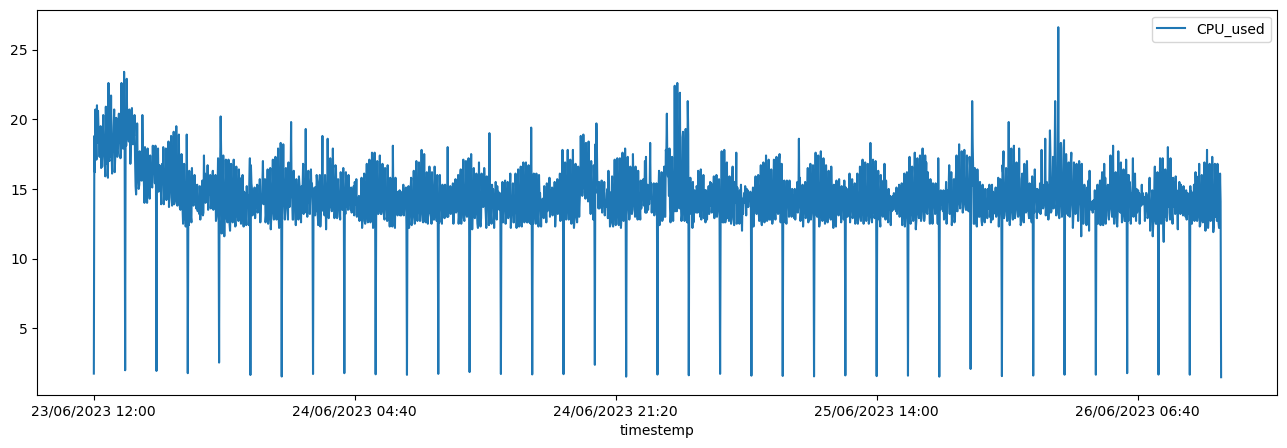

In [338]:
df.set_index('timestemp').plot(figsize=(16, 5))

In [339]:
df['timestemp']

0       23/06/2023 12:00
1       23/06/2023 12:02
2       23/06/2023 12:04
3       23/06/2023 12:06
4       23/06/2023 12:08
              ...       
2156    26/06/2023 11:52
2157    26/06/2023 11:54
2158    26/06/2023 11:56
2159    26/06/2023 11:58
2160    26/06/2023 12:00
Name: timestemp, Length: 2161, dtype: object

In [340]:
#df.index = pd.to_datetime(df['timestemp'])
#df.index

In [341]:
#train = df["2023-06-13":"2023-12-07 "]
#test = df.loc["2023-07-13 "].drop(columns=['timestemp'],axis=1)

#train= train.iloc[:-2].drop(columns=['timestemp'],axis=1)

#train
#test

In [342]:
df.describe()

,CPU_used
count,2161.000000
mean,14.347191
std,2.425386
min,1.490000
25%,13.200000
50%,14.100000
75%,15.400000
max,26.600000


In [343]:
import pandas as pd


In [344]:
df.set_index("timestemp", inplace=True)
df.head()
#df["06/07/2023":"13/07/2023"]['CPU_used']

,CPU_used
timestemp,
23/06/2023 12:00,1.75
23/06/2023 12:02,18.80
23/06/2023 12:04,16.20
23/06/2023 12:06,20.70
23/06/2023 12:08,18.80


In [345]:
df['CPU_used']

timestemp
23/06/2023 12:00     1.75
23/06/2023 12:02    18.80
23/06/2023 12:04    16.20
23/06/2023 12:06    20.70
23/06/2023 12:08    18.80
                    ...  
26/06/2023 11:52    12.20
26/06/2023 11:54    12.80
26/06/2023 11:56    16.10
26/06/2023 11:58    14.10
26/06/2023 12:00     1.49
Name: CPU_used, Length: 2161, dtype: float64

Text(0.5, 0, 'CPU_used')

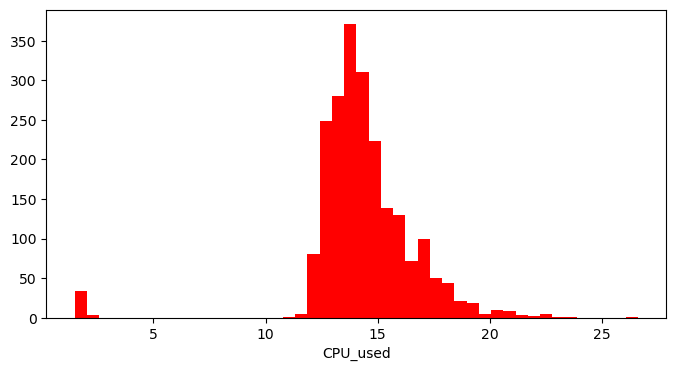

In [346]:
import numpy as np
import matplotlib.pyplot as plt
# Find the square root of the length of cpu_used
n_bins = np.sqrt(len(df['CPU_used']))
# Cast to an integer
n_bins = int(n_bins)
# Plot
plt.figure(figsize=(8, 4))
plt.hist(df['CPU_used'], bins=n_bins, color='red')
plt.xlabel('CPU_used')

Text(0.5, 0, 'CPU_used')

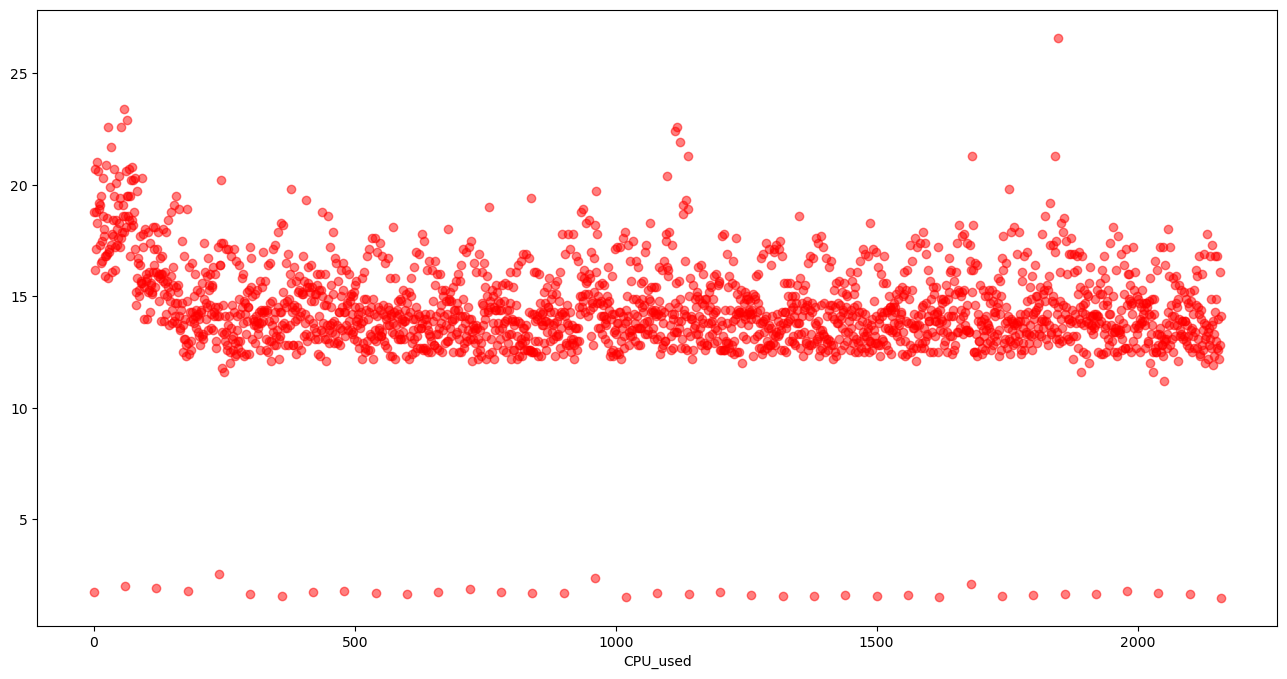

In [347]:
integers = range(len(df['CPU_used']))
plt.figure(figsize=(16, 8))
plt.scatter(integers, df['CPU_used'], c='red', alpha=0.5)
plt.xlabel('CPU_used')

Text(0.5, 0, 'CPU_used')

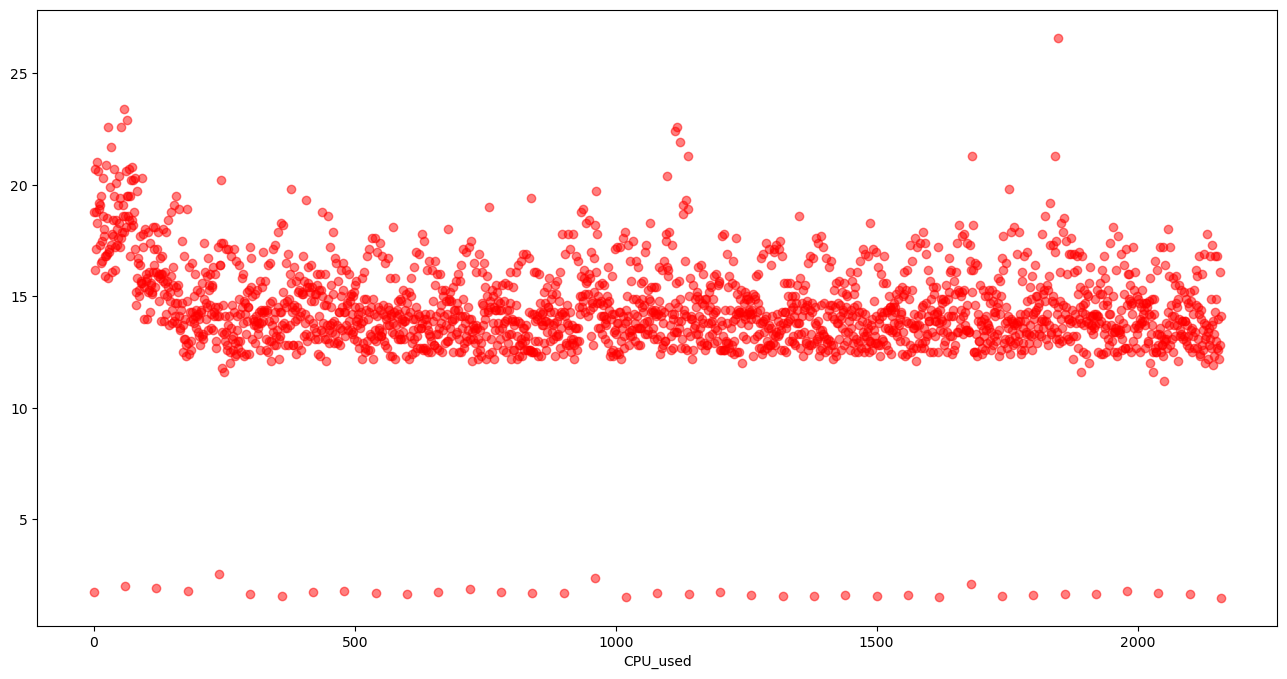

In [348]:
integers = range(len(df['CPU_used']))
plt.figure(figsize=(16, 8))
plt.scatter(integers, df['CPU_used'], c='red', alpha=0.5)
plt.xlabel('CPU_used')



### Finding outliers with IQR

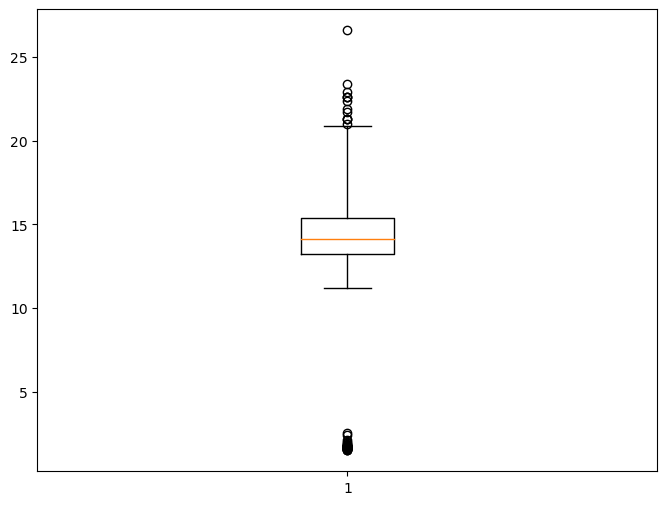

In [349]:
import matplotlib.pyplot as plt
#plt.boxplot(df['CPU_used'])
#plt.xlabel("CPU_used")
#figsize(16,8)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the boxplot
ax.boxplot(df['CPU_used'], whis=2.5)

# Display the plot
plt.show()

In [350]:
# Calculate the percentiles
q1 =df['CPU_used'].quantile(0.25)
q3 = df['CPU_used'].quantile(0.75)
# Calculate IQR
IQR = q3 - q1
# Set Multiplying factor
factor = 1.5
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [351]:
# Create masks
is_lower = df['CPU_used'] < lower_limit
is_upper = df['CPU_used'] > upper_limit
# Filter
outliers = df['CPU_used'][is_lower | is_upper]
# Print the # of outliers
print(len(outliers))
print ('pourcentage of outliers is {}'.format((len(outliers)/df.shape[0]*100)))

100
pourcentage of outliers is 4.6274872744099955


### Using z-scores for Anomaly Detection

In [352]:
from scipy.stats import zscore
scores = zscore( df['CPU_used'])
scores[:5]

timestemp
23/06/2023 12:00   -5.195094
23/06/2023 12:02    1.836343
23/06/2023 12:04    0.764100
23/06/2023 12:06    2.619905
23/06/2023 12:08    1.836343
Name: CPU_used, dtype: float64

In [353]:
is_over_3 = np.abs(scores) > 3
is_over_3 

timestemp
23/06/2023 12:00     True
23/06/2023 12:02    False
23/06/2023 12:04    False
23/06/2023 12:06    False
23/06/2023 12:08    False
                    ...  
26/06/2023 11:52    False
26/06/2023 11:54    False
26/06/2023 11:56    False
26/06/2023 11:58    False
26/06/2023 12:00     True
Name: CPU_used, Length: 2161, dtype: bool

In [354]:
is_over_3 = np.abs(scores) > 3
outliers = df['CPU_used'][is_over_3]
print(len(outliers))

46


### interpretation : 
As we saw the number of outliers has droped from 380 to 97 .we can explain that with these points :
Drawbacks of z-scores
Only works best with normally distributed data
Mean and STD are heavily influenced by outliers 
Performance suffers from too many outliers
one solution to this problem is :to use  Modified z-score with Mad wich is implemented in PyOD: python outlier detection 

###  Modified z-score with Mad

In [355]:
from pyod.models.mad import MAD
# threshold defaults to 3.5
mad = MAD(threshold=3.5)
# Reshape sales
cpu_reshaped = df['CPU_used'].values.reshape(-1, 1)


In [356]:
labels = mad.fit_predict(cpu_reshaped)
print(labels.sum())

81


C:\Users\G701857\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [357]:
from pyod.models.iforest import IForest
iforest = IForest()
labels = iforest.fit_predict(df)
print(labels)

C:\Users\G701857\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


[1 1 0 ... 0 0 1]


In [358]:
outliers = df[labels == 1]
print(outliers.shape)

(208, 1)


In [359]:
from pyod.models.iforest import IForest
iforest = IForest(contamination=0.1,max_features=0.5, random_state=1).fit(df)# Generate probabilities
probs = iforest.predict_proba(df)
# Isolate the outliers
is_outlier = probs[:, 1] > 0.75
outliers = df[is_outlier]
print(len(outliers))

52


C:\Users\G701857\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


??

In [360]:
outliers = df[iforest.labels_== 1]

len(outliers)


216

In [361]:
outliers.index

Index(['23/06/2023 12:00', '23/06/2023 12:02', '23/06/2023 12:06',
       '23/06/2023 12:08', '23/06/2023 12:12', '23/06/2023 12:14',
       '23/06/2023 12:16', '23/06/2023 12:18', '23/06/2023 12:20',
       '23/06/2023 12:24',
       ...
       '26/06/2023 08:20', '26/06/2023 08:36', '26/06/2023 09:14',
       '26/06/2023 10:00', '26/06/2023 11:00', '26/06/2023 11:06',
       '26/06/2023 11:10', '26/06/2023 11:30', '26/06/2023 11:52',
       '26/06/2023 12:00'],
      dtype='object', name='timestemp', length=216)

In [362]:
import seaborn as sns

<Axes: xlabel='timestemp', ylabel='CPU_used'>

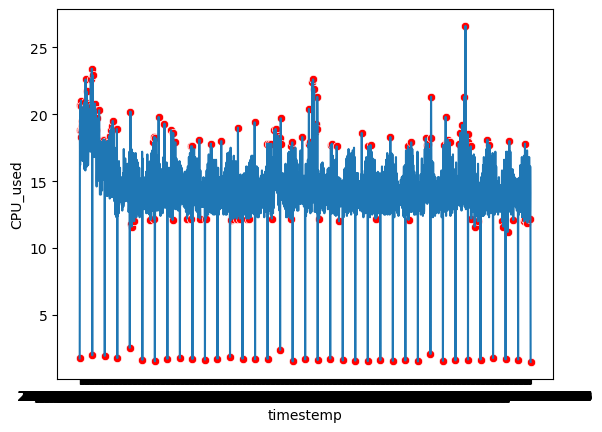

In [363]:
plt.plot(df)
sns.scatterplot(outliers['CPU_used'],color='red')

In [364]:
outlier_probs = iforest.predict_proba(outliers)
print(outlier_probs[:10])

[[0.07882003 0.92117997]
 [0.51970267 0.48029733]
 [0.25587187 0.74412813]
 [0.51970267 0.48029733]
 [0.21511661 0.78488339]
 [0.59433916 0.40566084]
 [0.26192506 0.73807494]
 [0.45716392 0.54283608]
 [0.51101726 0.48898274]
 [0.48718703 0.51281297]]


C:\Users\G701857\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


the treshold for probs was set below 0.5 we have an oulier proba eqaul to 0.49 that is assigned to ifores label =1 which considered as outlier this explains why the first method reveals less numbers of outliers because I set a high treshold

Hyperparameters which influence iForest:
*contamination
*n_estimators
*max_samples
*max_features


In [365]:
def evaluate_outlier_classifier(model, data):
# Get labels
    labels = model.fit_predict(data)
# Return inliers
    return data[labels == 0]
inliers=evaluate_outlier_classifier(iforest, df)
inliers['CPU_used'].values

C:\Users\G701857\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


array([16.2, 17.1, 17.3, ..., 12.8, 16.1, 14.1])

In [366]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [367]:
def evaluate_regressor(inliers):
    X = inliers.drop(df["CPU_used"].values, axis=1)
    y =inliers['CPU_used'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    preds = lr.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return round(rmse, 3)
evaluate_regressor(inliers)

KeyError: '[1.75, 18.8, 16.2, 20.7, 18.8, 17.1, 21.0, 18.3, 20.6, 19.2, 18.9, 17.3, 19.1, 19.5, 16.5, 17.5, 16.6, 18.6, 20.3, 18.0, 17.7, 16.8, 15.9, 20.9, 16.8, 16.9, 18.5, 15.8, 22.6, 17.1, 17.0, 19.9, 17.3, 21.7, 17.8, 16.1, 18.4, 17.7, 19.5, 20.7, 16.2, 17.2, 18.4, 20.1, 18.0, 17.3, 17.6, 19.1, 20.4, 18.3, 19.4, 17.2, 17.6, 22.6, 17.9, 19.1, 18.6, 17.9, 23.4, 18.6, 1.99, 20.6, 18.1, 22.9, 19.5, 18.6, 19.5, 18.4, 20.7, 19.5, 16.8, 18.1, 20.2, 20.8, 18.4, 18.2, 20.2, 18.8, 20.3, 17.1, 15.2, 14.6, 15.8, 19.7, 16.7, 16.5, 15.0, 15.3, 17.7, 16.4, 15.7, 15.6, 15.6, 20.3, 17.8, 17.2, 15.4, 14.0, 18.0, 16.0, 15.7, 15.8, 14.0, 17.9, 15.2, 16.1, 15.3, 14.3, 17.4, 15.6, 15.5, 15.2, 15.1, 18.1, 16.1, 17.1, 16.4, 15.4, 18.1, 16.1, 1.94, 17.1, 15.9, 17.9, 14.8, 16.0, 16.7, 15.8, 16.0, 13.9, 16.0, 16.8, 15.7, 18.0, 13.9, 15.1, 16.1, 15.6, 17.9, 14.2, 15.0, 15.7, 15.4, 18.4, 13.7, 14.8, 15.2, 15.9, 18.8, 14.4, 13.8, 15.5, 16.3, 19.1, 13.9, 14.1, 14.7, 15.4, 19.5, 14.7, 13.8, 15.2, 15.5, 18.9, 14.1, 13.6, 13.5, 14.4, 17.5, 14.7, 13.7, 12.5, 13.1, 16.8, 14.0, 13.1, 12.3, 12.8, 18.9, 14.8, 1.78, 12.9, 12.4, 16.3, 14.3, 13.9, 13.0, 12.6, 16.5, 14.3, 14.0, 13.8, 15.0, 16.0, 14.1, 14.4, 13.6, 14.1, 15.3, 13.4, 14.2, 14.0, 13.2, 15.2, 12.8, 14.4, 14.3, 13.2, 15.6, 13.1, 13.3, 17.4, 14.9, 16.1, 14.0, 14.7, 15.9, 14.5, 16.7, 13.5, 15.5, 15.3, 14.6, 16.0, 13.6, 14.2, 15.4, 15.5, 16.3, 13.5, 14.1, 14.3, 14.5, 16.0, 12.7, 13.0, 14.1, 14.5, 17.2, 14.1, 2.54, 16.4, 16.4, 20.2, 17.4, 11.8, 13.4, 14.6, 17.4, 13.3, 11.6, 13.0, 14.1, 17.1, 13.4, 12.8, 12.6, 13.7, 17.1, 14.1, 12.5, 12.0, 13.6, 16.8, 14.6, 13.1, 12.6, 13.2, 17.1, 14.3, 12.9, 12.3, 12.4, 16.6, 14.1, 13.5, 13.0, 12.7, 16.4, 14.9, 14.2, 13.0, 12.5, 15.8, 14.5, 16.0, 13.8, 12.3, 14.8, 14.2, 14.7, 13.3, 12.4, 15.2, 13.9, 14.5, 14.5, 12.4, 15.3, 17.2, 1.65, 16.7, 15.4, 15.0, 13.1, 14.0, 13.9, 13.7, 15.1, 12.9, 13.7, 14.1, 13.9, 15.3, 13.3, 13.6, 14.3, 13.8, 15.7, 12.6, 13.8, 14.4, 14.3, 15.4, 17.0, 13.9, 14.4, 14.3, 15.7, 12.6, 13.1, 14.4, 14.3, 16.4, 12.5, 13.0, 13.9, 14.7, 16.5, 12.1, 13.0, 13.7, 14.8, 17.1, 13.4, 12.8, 14.0, 14.3, 17.3, 13.2, 12.8, 13.5, 14.5, 17.9, 13.1, 12.2, 13.2, 14.3, 18.3, 14.3, 1.54, 13.7, 15.2, 18.2, 14.7, 13.8, 12.8, 13.6, 16.5, 14.5, 14.8, 13.6, 12.8, 16.9, 14.9, 13.7, 16.0, 15.6, 19.8, 14.5, 14.3, 12.8, 12.8, 16.3, 14.6, 14.4, 13.9, 12.4, 15.7, 14.0, 14.5, 15.2, 12.8, 15.9, 15.3, 14.1, 14.3, 12.6, 15.2, 15.1, 15.1, 16.8, 13.2, 15.7, 14.2, 13.8, 19.3, 13.3, 15.4, 13.0, 15.6, 16.3, 14.0, 15.4, 13.2, 15.2, 16.4, 14.8, 15.4, 13.8, 1.72, 14.8, 13.6, 15.1, 13.1, 15.1, 13.4, 16.0, 15.5, 13.1, 12.4, 14.1, 15.3, 16.0, 12.3, 13.5, 15.3, 15.0, 18.8, 13.8, 13.4, 14.6, 13.1, 16.0, 14.6, 12.1, 13.7, 13.1, 18.6, 14.9, 12.9, 13.5, 13.7, 17.2, 15.5, 14.5, 13.4, 13.8, 17.9, 15.1, 13.9, 12.9, 13.3, 16.7, 16.5, 13.7, 12.9, 13.0, 15.7, 14.3, 14.3, 13.6, 12.8, 16.2, 15.0, 14.5, 13.5, 15.3, 16.5, 14.3, 1.78, 14.3, 13.2, 16.2, 13.7, 14.7, 14.6, 13.5, 16.0, 13.9, 14.8, 15.0, 13.5, 15.1, 13.3, 14.2, 15.0, 13.4, 15.2, 13.1, 15.5, 14.5, 13.9, 15.7, 13.0, 13.7, 14.0, 14.2, 14.5, 12.7, 13.6, 13.8, 14.3, 15.8, 12.2, 12.9, 13.9, 14.9, 16.1, 12.7, 12.5, 14.4, 14.9, 16.8, 13.0, 12.6, 14.0, 14.3, 17.1, 13.3, 12.6, 13.2, 14.5, 17.6, 14.9, 12.2, 13.1, 14.2, 17.6, 13.5, 1.7, 13.0, 14.1, 17.0, 14.5, 13.2, 13.6, 13.5, 17.4, 14.4, 13.2, 13.2, 13.4, 16.8, 14.6, 14.2, 13.0, 12.8, 16.5, 14.1, 14.0, 13.7, 12.7, 16.7, 14.5, 14.4, 13.7, 12.3, 15.8, 14.1, 14.2, 13.4, 12.3, 18.1, 13.8, 14.3, 13.3, 12.2, 15.8, 13.7, 14.4, 14.1, 13.1, 14.8, 13.3, 14.2, 14.9, 13.1, 14.8, 13.1, 13.8, 14.0, 13.4, 15.3, 13.1, 13.9, 14.4, 13.9, 15.1, 12.3, 1.66, 14.7, 14.1, 15.2, 12.2, 13.2, 14.3, 15.0, 15.8, 12.4, 12.9, 13.5, 14.0, 16.3, 13.1, 12.5, 14.0, 14.5, 17.0, 13.2, 12.7, 13.6, 14.2, 16.9, 14.1, 12.7, 13.6, 13.6, 17.8, 13.8, 12.7, 12.6, 14.0, 17.5, 14.2, 12.7, 12.6, 14.0, 16.2, 13.7, 12.5, 13.5, 13.3, 16.6, 14.2, 13.2, 13.0, 12.5, 16.2, 14.8, 13.9, 12.8, 12.8, 16.6, 15.5, 14.1, 13.3, 12.7, 16.0, 13.3, 1.73, 13.6, 12.6, 16.0, 14.3, 14.6, 13.8, 12.5, 15.3, 13.5, 15.0, 14.1, 12.9, 15.3, 13.7, 14.8, 14.2, 13.0, 18.0, 13.0, 14.8, 14.9, 13.6, 15.2, 13.2, 14.8, 14.0, 13.9, 15.4, 12.5, 14.0, 14.4, 14.4, 15.7, 13.3, 13.4, 14.7, 14.4, 16.0, 12.5, 13.1, 14.1, 15.7, 16.4, 12.5, 13.6, 14.1, 14.9, 17.1, 12.9, 12.7, 13.8, 14.1, 17.0, 13.2, 13.0, 13.5, 14.5, 17.2, 14.0, 1.86, 13.1, 14.0, 17.5, 13.4, 12.1, 13.1, 13.7, 16.5, 13.6, 12.9, 13.5, 13.7, 16.1, 13.6, 12.5, 12.2, 13.1, 16.9, 13.5, 12.6, 12.3, 12.9, 16.1, 14.7, 14.6, 13.7, 14.3, 16.5, 15.4, 14.0, 13.2, 12.2, 15.9, 15.0, 14.3, 14.4, 12.4, 19.0, 14.5, 14.8, 13.1, 12.5, 15.3, 13.8, 15.0, 14.5, 12.2, 14.4, 13.5, 15.5, 14.4, 12.8, 15.2, 13.8, 14.8, 14.4, 13.5, 14.7, 13.1, 1.72, 14.4, 13.6, 15.5, 12.6, 13.8, 14.8, 13.9, 15.6, 12.5, 13.2, 14.4, 14.0, 15.5, 12.9, 13.3, 14.4, 14.7, 16.1, 12.2, 13.3, 13.9, 14.0, 15.4, 12.6, 12.6, 13.7, 13.9, 16.1, 14.6, 12.2, 13.2, 13.9, 16.4, 12.8, 12.3, 12.8, 13.8, 16.6, 13.1, 12.3, 12.9, 13.6, 16.9, 13.6, 12.6, 13.0, 13.2, 16.9, 13.7, 12.6, 12.6, 13.2, 16.7, 14.3, 12.6, 12.6, 12.5, 19.4, 14.2, 1.69, 12.5, 12.5, 16.1, 14.2, 13.9, 13.0, 12.5, 16.1, 14.0, 14.1, 13.0, 12.3, 16.0, 14.3, 14.7, 13.9, 12.3, 14.2, 13.7, 14.3, 13.7, 12.9, 15.2, 13.9, 14.7, 13.9, 12.6, 15.4, 13.4, 14.5, 14.5, 13.8, 15.8, 13.0, 14.3, 14.9, 13.4, 15.1, 13.1, 13.7, 14.3, 13.8, 15.5, 12.3, 13.2, 15.1, 13.9, 15.7, 13.2, 13.3, 14.8, 14.1, 16.1, 12.7, 13.6, 14.3, 14.2, 17.8, 12.4, 1.71, 14.3, 14.1, 16.9, 12.9, 12.8, 13.8, 14.6, 17.8, 13.7, 12.8, 13.5, 14.3, 17.1, 13.1, 12.5, 12.9, 13.7, 17.8, 13.1, 12.2, 12.8, 13.6, 16.8, 13.6, 13.0, 12.6, 13.6, 16.6, 14.5, 13.0, 14.2, 15.0, 18.8, 15.9, 15.0, 14.5, 14.8, 18.9, 16.2, 15.8, 15.1, 14.3, 18.3, 15.6, 15.7, 15.1, 14.1, 18.4, 16.0, 15.8, 14.4, 13.2, 17.0, 14.7, 14.8, 14.5, 12.8, 16.7, 15.2, 2.38, 18.2, 16.1, 19.7, 17.8, 14.7, 15.0, 13.6, 15.5, 13.6, 14.7, 14.8, 14.1, 15.6, 13.3, 14.1, 14.6, 14.1, 15.5, 13.1, 13.8, 14.0, 13.7, 14.7, 15.0, 12.9, 16.3, 14.4, 14.8, 12.3, 12.5, 14.0, 14.2, 15.9, 12.6, 12.3, 13.4, 14.2, 17.1, 13.5, 12.4, 13.3, 13.8, 17.2, 13.8, 12.5, 12.4, 14.3, 17.2, 14.3, 12.2, 13.0, 13.6, 17.6, 14.1, 12.7, 13.2, 13.8, 17.9, 14.4, 1.53, 13.9, 15.0, 17.3, 14.1, 13.4, 12.8, 13.2, 16.6, 15.7, 13.5, 13.2, 13.5, 17.5, 14.9, 14.2, 13.8, 13.0, 16.6, 14.9, 14.1, 13.6, 12.8, 16.3, 13.6, 14.7, 13.6, 12.8, 15.6, 13.6, 14.9, 14.5, 14.3, 15.7, 13.8, 14.6, 17.0, 13.3, 17.3, 13.3, 13.9, 15.3, 13.5, 14.9, 13.9, 14.8, 18.3, 14.3, 15.4, 13.3, 14.4, 14.3, 13.6, 15.4, 13.1, 14.2, 14.4, 14.1, 15.4, 13.1, 1.68, 14.2, 14.8, 16.3, 12.4, 13.2, 14.1, 14.4, 16.2, 12.7, 12.8, 13.8, 14.3, 16.6, 13.0, 13.0, 17.8, 17.5, 20.4, 16.3, 15.9, 16.2, 14.5, 17.9, 13.7, 12.6, 13.2, 14.2, 17.3, 14.0, 12.7, 14.2, 13.4, 22.4, 14.7, 13.4, 15.6, 13.4, 22.6, 14.5, 13.9, 15.7, 13.6, 21.9, 14.9, 13.9, 12.7, 13.1, 18.7, 19.1, 14.2, 14.4, 12.7, 16.6, 19.3, 14.1, 13.4, 12.6, 21.3, 18.9, 1.63, 15.0, 13.2, 15.8, 14.0, 14.1, 14.0, 12.2, 15.5, 12.6, 13.6, 14.9, 13.7, 14.5, 13.3, 15.2, 15.0, 13.3, 16.3, 14.9, 14.1, 13.6, 13.0, 16.4, 12.8, 14.7, 14.0, 13.8, 16.0, 12.9, 14.6, 14.9, 12.6, 14.9, 12.8, 12.8, 14.4, 13.8, 15.2, 13.2, 14.5, 15.5, 13.8, 15.4, 13.3, 13.9, 14.9, 14.2, 15.9, 12.9, 13.6, 14.3, 14.4, 16.0, 13.0, 13.5, 15.5, 15.6, 15.7, 12.6, 1.73, 12.6, 13.9, 17.7, 13.7, 12.6, 13.2, 12.6, 17.8, 14.4, 12.6, 13.0, 12.9, 16.9, 13.8, 12.9, 15.4, 12.7, 15.9, 14.4, 13.6, 12.5, 12.8, 15.6, 16.6, 13.9, 13.0, 12.4, 15.5, 14.0, 14.2, 17.6, 12.5, 15.1, 14.2, 14.4, 14.3, 12.5, 14.9, 14.3, 15.3, 13.8, 12.0, 14.3, 13.2, 14.1, 14.7, 14.0, 15.2, 14.9, 13.1, 15.0, 14.2, 14.9, 13.7, 14.3, 14.4, 14.2, 14.8, 14.0, 1.6, 14.4, 14.2, 15.1, 12.3, 13.1, 15.0, 14.9, 15.9, 14.0, 13.2, 14.3, 14.7, 16.0, 13.3, 12.7, 13.8, 14.4, 16.7, 12.7, 12.4, 13.8, 13.9, 16.9, 13.4, 12.6, 14.0, 14.1, 17.4, 13.0, 12.7, 12.8, 13.6, 17.1, 13.7, 12.8, 12.8, 13.6, 16.4, 14.1, 12.5, 12.9, 13.3, 17.1, 17.0, 13.2, 12.8, 13.4, 17.3, 14.2, 13.9, 13.2, 13.3, 17.1, 17.5, 13.7, 12.6, 13.5, 16.8, 14.3, 1.58, 13.8, 12.6, 15.6, 14.3, 14.3, 13.6, 12.5, 15.6, 13.8, 15.0, 13.9, 13.0, 15.6, 14.0, 14.7, 14.4, 13.0, 15.0, 13.2, 14.5, 14.1, 12.9, 15.0, 12.8, 13.8, 14.7, 14.4, 15.5, 13.3, 13.8, 18.6, 13.8, 15.8, 12.7, 13.3, 14.7, 14.1, 15.3, 12.3, 13.4, 14.4, 14.5, 15.5, 12.9, 13.0, 14.6, 14.8, 16.5, 12.6, 12.8, 14.1, 14.4, 16.8, 12.8, 13.3, 14.3, 14.7, 16.7, 12.9, 1.55, 13.8, 14.5, 17.6, 13.7, 13.1, 13.0, 13.9, 17.4, 13.2, 12.3, 12.6, 13.5, 17.7, 14.6, 13.5, 12.7, 13.3, 17.2, 14.7, 13.2, 12.5, 13.1, 16.7, 14.1, 12.9, 12.6, 13.1, 16.3, 14.4, 14.6, 13.0, 12.8, 16.6, 14.6, 14.1, 12.8, 12.2, 15.3, 14.0, 14.5, 12.5, 12.3, 15.6, 13.8, 14.7, 13.8, 13.1, 15.7, 14.1, 14.6, 14.0, 12.6, 15.2, 13.6, 14.3, 14.4, 12.8, 15.6, 13.4, 1.62, 15.1, 14.5, 15.0, 13.0, 13.4, 14.2, 13.9, 16.1, 12.6, 13.6, 14.4, 14.1, 15.7, 12.9, 13.2, 15.1, 14.5, 15.4, 12.5, 13.1, 14.1, 14.6, 16.1, 12.5, 12.9, 14.3, 13.7, 16.6, 13.0, 12.7, 13.9, 14.3, 17.1, 13.4, 12.5, 13.2, 14.2, 16.9, 13.2, 12.7, 13.4, 13.8, 16.8, 13.6, 12.5, 13.0, 13.0, 18.3, 13.7, 12.9, 12.6, 14.0, 17.1, 14.8, 13.5, 12.9, 13.2, 17.0, 14.1, 1.57, 12.9, 12.8, 16.3, 14.0, 13.8, 12.8, 12.3, 16.0, 14.3, 14.1, 13.1, 13.0, 15.6, 14.3, 16.8, 13.6, 12.8, 15.6, 14.3, 14.4, 13.6, 12.6, 15.0, 13.5, 14.5, 14.5, 12.4, 14.4, 13.4, 14.1, 14.5, 13.5, 14.7, 13.8, 14.3, 14.5, 13.4, 15.1, 13.2, 13.8, 14.9, 13.7, 15.3, 13.0, 14.0, 14.2, 14.3, 15.4, 12.4, 13.4, 15.0, 15.1, 16.1, 12.3, 13.0, 13.9, 15.3, 16.2, 12.4, 1.6, 13.8, 14.9, 17.3, 12.8, 12.5, 13.8, 15.3, 16.6, 13.6, 12.7, 13.6, 14.2, 17.6, 13.7, 12.1, 12.7, 13.7, 17.2, 14.1, 13.3, 12.9, 13.7, 17.4, 14.2, 12.7, 12.9, 14.5, 17.9, 14.6, 13.6, 12.7, 13.0, 17.4, 14.7, 16.9, 13.3, 13.2, 16.2, 14.1, 13.9, 13.9, 12.5, 15.7, 14.4, 14.9, 13.4, 12.5, 15.4, 14.2, 15.1, 13.9, 13.2, 15.4, 13.9, 14.3, 14.2, 12.5, 17.2, 13.8, 1.53, 14.4, 13.5, 14.9, 14.0, 13.9, 14.7, 13.4, 14.9, 12.8, 13.0, 14.8, 13.8, 15.5, 12.5, 13.4, 14.9, 14.1, 15.2, 16.7, 13.2, 16.1, 14.1, 16.2, 12.4, 13.2, 14.1, 14.4, 15.7, 12.6, 12.8, 15.1, 16.1, 17.4, 13.4, 13.4, 15.3, 15.2, 18.2, 14.0, 13.6, 14.4, 15.0, 17.7, 15.2, 13.3, 14.1, 15.3, 17.8, 14.3, 13.7, 13.5, 13.5, 17.4, 14.6, 13.5, 13.4, 13.4, 17.3, 16.6, 2.08, 16.2, 15.2, 21.3, 18.2, 16.2, 12.5, 12.5, 16.5, 14.6, 13.3, 12.5, 12.3, 16.4, 14.2, 13.9, 13.0, 13.0, 15.5, 13.7, 13.9, 12.7, 12.4, 15.3, 13.5, 14.0, 13.2, 12.6, 15.0, 13.5, 14.1, 13.8, 12.9, 15.0, 13.7, 13.6, 15.3, 13.0, 14.7, 12.6, 13.4, 15.3, 12.8, 14.8, 13.2, 14.3, 14.3, 14.1, 15.1, 13.0, 13.3, 14.5, 14.7, 15.8, 12.3, 13.5, 14.2, 15.7, 15.0, 12.6, 1.57, 16.7, 16.2, 17.7, 12.9, 13.1, 13.8, 14.5, 16.5, 13.9, 12.7, 13.6, 14.1, 19.8, 13.1, 12.4, 13.0, 14.0, 17.9, 13.9, 13.5, 12.8, 13.8, 18.1, 13.7, 12.9, 13.2, 13.8, 16.9, 13.7, 13.9, 13.0, 13.3, 17.9, 14.2, 13.9, 12.4, 12.6, 15.7, 16.1, 13.6, 12.9, 12.6, 16.8, 14.2, 13.9, 13.3, 13.4, 17.0, 14.8, 14.3, 13.3, 12.9, 15.4, 13.7, 14.9, 13.2, 12.6, 15.9, 14.2, 1.61, 14.0, 13.3, 16.4, 14.3, 15.0, 14.4, 12.9, 15.0, 13.6, 14.5, 14.7, 13.3, 15.4, 13.2, 13.9, 17.8, 14.0, 15.1, 13.6, 13.9, 15.3, 14.8, 18.6, 13.1, 13.9, 15.5, 14.2, 15.3, 12.8, 13.7, 15.9, 19.2, 17.3, 13.3, 13.4, 14.8, 15.0, 17.3, 13.6, 14.7, 17.0, 21.3, 17.5, 13.1, 13.4, 14.2, 14.5, 26.6, 13.1, 12.9, 16.1, 14.8, 18.3, 14.0, 13.0, 13.6, 14.6, 17.9, 18.5, 1.67, 14.2, 14.5, 17.5, 16.0, 13.2, 14.0, 13.1, 16.9, 14.0, 13.0, 13.8, 16.9, 17.6, 14.4, 13.9, 12.2, 13.2, 16.9, 16.1, 14.2, 13.2, 13.8, 16.8, 16.2, 15.1, 12.7, 14.0, 17.0, 15.4, 14.5, 13.8, 11.6, 16.8, 14.3, 14.6, 12.5, 13.7, 15.3, 14.2, 14.7, 13.9, 12.4, 15.1, 15.0, 13.8, 15.6, 12.0, 16.3, 14.1, 13.7, 13.5, 13.7, 14.1, 13.3, 14.1, 14.2, 13.6, 14.9, 13.7, 1.67, 14.2, 14.1, 15.3, 12.5, 14.1, 13.8, 15.1, 15.6, 12.4, 13.9, 15.1, 16.2, 14.6, 12.4, 13.3, 16.8, 13.6, 15.8, 12.5, 13.7, 14.8, 14.6, 15.3, 13.1, 12.8, 14.2, 14.2, 17.4, 13.7, 13.4, 13.0, 15.0, 18.1, 13.4, 12.5, 13.4, 13.6, 16.2, 13.6, 12.5, 12.3, 13.5, 17.7, 14.0, 13.4, 13.5, 13.3, 16.9, 14.4, 12.6, 13.1, 13.8, 16.4, 15.1, 12.7, 12.7, 13.6, 17.1, 14.6, 1.78, 16.0, 12.7, 16.0, 14.9, 15.5, 14.8, 12.5, 14.6, 14.7, 14.2, 17.2, 13.0, 15.3, 13.6, 16.1, 13.7, 12.7, 15.0, 13.3, 13.6, 14.9, 13.7, 14.7, 12.5, 14.0, 14.5, 13.8, 15.3, 13.9, 14.7, 14.2, 13.9, 14.4, 12.7, 13.7, 14.7, 14.7, 14.5, 12.9, 13.0, 14.2, 14.8, 15.8, 12.0, 13.3, 14.1, 13.7, 14.9, 11.6, 12.5, 14.2, 14.9, 16.6, 12.7, 12.5, 12.5, 13.3, 16.2, 12.8, 1.68, 13.3, 13.6, 17.2, 13.2, 12.5, 12.8, 12.8, 17.2, 12.3, 11.2, 13.1, 13.0, 16.4, 13.8, 13.1, 12.7, 13.3, 18.0, 14.3, 13.7, 15.9, 12.8, 17.2, 14.6, 14.1, 13.1, 12.5, 15.8, 14.1, 13.7, 15.5, 13.2, 15.9, 14.7, 14.5, 13.7, 12.1, 14.9, 14.0, 15.5, 13.5, 13.2, 15.3, 13.3, 13.9, 13.9, 13.1, 15.2, 13.2, 13.9, 13.9, 13.0, 14.9, 12.8, 13.7, 14.7, 13.2, 14.5, 12.7, 1.67, 15.2, 13.5, 14.8, 12.5, 13.6, 14.2, 13.2, 15.3, 12.7, 13.4, 16.2, 14.6, 15.9, 12.7, 13.1, 14.5, 14.2, 16.8, 12.3, 12.4, 14.0, 14.4, 16.0, 12.8, 12.6, 13.5, 13.8, 16.9, 13.1, 12.0, 13.2, 13.7, 17.8, 13.4, 12.2, 12.8, 13.6, 16.8, 13.1, 12.7, 14.9, 13.7, 17.3, 13.9, 11.9, 12.3, 13.3, 16.8, 14.3, 13.0, 14.9, 12.7, 16.8, 14.0, 12.6, 12.2, 12.8, 16.1, 14.1, 1.49] not found in axis'

In [368]:
contaminations = [0.05, 0.1, 0.2, 0.3]
scores = dict()
for c in contaminations:
# Instantiate IForest with the current c
    iforest = IForest(contamination=c, random_state=10)
# Get inliers with the current IForest
    inliers = evaluate_outlier_classifier(iforest, df)
# Calculate and store RMSE into scores
    scores[c] = evaluate_regressor(inliers)


C:\Users\G701857\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


KeyError: '[1.75, 18.8, 16.2, 20.7, 18.8, 17.1, 21.0, 18.3, 20.6, 19.2, 18.9, 17.3, 19.1, 19.5, 16.5, 17.5, 16.6, 18.6, 20.3, 18.0, 17.7, 16.8, 15.9, 20.9, 16.8, 16.9, 18.5, 15.8, 22.6, 17.1, 17.0, 19.9, 17.3, 21.7, 17.8, 16.1, 18.4, 17.7, 19.5, 20.7, 16.2, 17.2, 18.4, 20.1, 18.0, 17.3, 17.6, 19.1, 20.4, 18.3, 19.4, 17.2, 17.6, 22.6, 17.9, 19.1, 18.6, 17.9, 23.4, 18.6, 1.99, 20.6, 18.1, 22.9, 19.5, 18.6, 19.5, 18.4, 20.7, 19.5, 16.8, 18.1, 20.2, 20.8, 18.4, 18.2, 20.2, 18.8, 20.3, 17.1, 15.2, 14.6, 15.8, 19.7, 16.7, 16.5, 15.0, 15.3, 17.7, 16.4, 15.7, 15.6, 15.6, 20.3, 17.8, 17.2, 15.4, 14.0, 18.0, 16.0, 15.7, 15.8, 14.0, 17.9, 15.2, 16.1, 15.3, 14.3, 17.4, 15.6, 15.5, 15.2, 15.1, 18.1, 16.1, 17.1, 16.4, 15.4, 18.1, 16.1, 1.94, 17.1, 15.9, 17.9, 14.8, 16.0, 16.7, 15.8, 16.0, 13.9, 16.0, 16.8, 15.7, 18.0, 13.9, 15.1, 16.1, 15.6, 17.9, 14.2, 15.0, 15.7, 15.4, 18.4, 13.7, 14.8, 15.2, 15.9, 18.8, 14.4, 13.8, 15.5, 16.3, 19.1, 13.9, 14.1, 14.7, 15.4, 19.5, 14.7, 13.8, 15.2, 15.5, 18.9, 14.1, 13.6, 13.5, 14.4, 17.5, 14.7, 13.7, 12.5, 13.1, 16.8, 14.0, 13.1, 12.3, 12.8, 18.9, 14.8, 1.78, 12.9, 12.4, 16.3, 14.3, 13.9, 13.0, 12.6, 16.5, 14.3, 14.0, 13.8, 15.0, 16.0, 14.1, 14.4, 13.6, 14.1, 15.3, 13.4, 14.2, 14.0, 13.2, 15.2, 12.8, 14.4, 14.3, 13.2, 15.6, 13.1, 13.3, 17.4, 14.9, 16.1, 14.0, 14.7, 15.9, 14.5, 16.7, 13.5, 15.5, 15.3, 14.6, 16.0, 13.6, 14.2, 15.4, 15.5, 16.3, 13.5, 14.1, 14.3, 14.5, 16.0, 12.7, 13.0, 14.1, 14.5, 17.2, 14.1, 2.54, 16.4, 16.4, 20.2, 17.4, 11.8, 13.4, 14.6, 17.4, 13.3, 11.6, 13.0, 14.1, 17.1, 13.4, 12.8, 12.6, 13.7, 17.1, 14.1, 12.5, 12.0, 13.6, 16.8, 14.6, 13.1, 12.6, 13.2, 17.1, 14.3, 12.9, 12.3, 12.4, 16.6, 14.1, 13.5, 13.0, 12.7, 16.4, 14.9, 14.2, 13.0, 12.5, 15.8, 14.5, 16.0, 13.8, 12.3, 14.8, 14.2, 14.7, 13.3, 12.4, 15.2, 13.9, 14.5, 14.5, 12.4, 15.3, 17.2, 1.65, 16.7, 15.4, 15.0, 13.1, 14.0, 13.9, 13.7, 15.1, 12.9, 13.7, 14.1, 13.9, 15.3, 13.3, 13.6, 14.3, 13.8, 15.7, 12.6, 13.8, 14.4, 14.3, 15.4, 17.0, 13.9, 14.4, 14.3, 15.7, 12.6, 13.1, 14.4, 14.3, 16.4, 12.5, 13.0, 13.9, 14.7, 16.5, 12.1, 13.0, 13.7, 14.8, 17.1, 13.4, 12.8, 14.0, 14.3, 17.3, 13.2, 12.8, 13.5, 14.5, 17.9, 13.1, 12.2, 13.2, 14.3, 18.3, 14.3, 1.54, 13.7, 15.2, 18.2, 14.7, 13.8, 12.8, 13.6, 16.5, 14.5, 14.8, 13.6, 12.8, 16.9, 14.9, 13.7, 16.0, 15.6, 19.8, 14.5, 14.3, 12.8, 12.8, 16.3, 14.6, 14.4, 13.9, 12.4, 15.7, 14.0, 14.5, 15.2, 12.8, 15.9, 15.3, 14.1, 14.3, 12.6, 15.2, 15.1, 15.1, 16.8, 13.2, 15.7, 14.2, 13.8, 19.3, 13.3, 15.4, 13.0, 15.6, 16.3, 14.0, 15.4, 13.2, 15.2, 16.4, 14.8, 15.4, 13.8, 1.72, 14.8, 13.6, 15.1, 13.1, 15.1, 13.4, 16.0, 15.5, 13.1, 12.4, 14.1, 15.3, 16.0, 12.3, 13.5, 15.3, 15.0, 18.8, 13.8, 13.4, 14.6, 13.1, 16.0, 14.6, 12.1, 13.7, 13.1, 18.6, 14.9, 12.9, 13.5, 13.7, 17.2, 15.5, 14.5, 13.4, 13.8, 17.9, 15.1, 13.9, 12.9, 13.3, 16.7, 16.5, 13.7, 12.9, 13.0, 15.7, 14.3, 14.3, 13.6, 12.8, 16.2, 15.0, 14.5, 13.5, 15.3, 16.5, 14.3, 1.78, 14.3, 13.2, 16.2, 13.7, 14.7, 14.6, 13.5, 16.0, 13.9, 14.8, 15.0, 13.5, 15.1, 13.3, 14.2, 15.0, 13.4, 15.2, 13.1, 15.5, 14.5, 13.9, 15.7, 13.0, 13.7, 14.0, 14.2, 14.5, 12.7, 13.6, 13.8, 14.3, 15.8, 12.2, 12.9, 13.9, 14.9, 16.1, 12.7, 12.5, 14.4, 14.9, 16.8, 13.0, 12.6, 14.0, 14.3, 17.1, 13.3, 12.6, 13.2, 14.5, 17.6, 14.9, 12.2, 13.1, 14.2, 17.6, 13.5, 1.7, 13.0, 14.1, 17.0, 14.5, 13.2, 13.6, 13.5, 17.4, 14.4, 13.2, 13.2, 13.4, 16.8, 14.6, 14.2, 13.0, 12.8, 16.5, 14.1, 14.0, 13.7, 12.7, 16.7, 14.5, 14.4, 13.7, 12.3, 15.8, 14.1, 14.2, 13.4, 12.3, 18.1, 13.8, 14.3, 13.3, 12.2, 15.8, 13.7, 14.4, 14.1, 13.1, 14.8, 13.3, 14.2, 14.9, 13.1, 14.8, 13.1, 13.8, 14.0, 13.4, 15.3, 13.1, 13.9, 14.4, 13.9, 15.1, 12.3, 1.66, 14.7, 14.1, 15.2, 12.2, 13.2, 14.3, 15.0, 15.8, 12.4, 12.9, 13.5, 14.0, 16.3, 13.1, 12.5, 14.0, 14.5, 17.0, 13.2, 12.7, 13.6, 14.2, 16.9, 14.1, 12.7, 13.6, 13.6, 17.8, 13.8, 12.7, 12.6, 14.0, 17.5, 14.2, 12.7, 12.6, 14.0, 16.2, 13.7, 12.5, 13.5, 13.3, 16.6, 14.2, 13.2, 13.0, 12.5, 16.2, 14.8, 13.9, 12.8, 12.8, 16.6, 15.5, 14.1, 13.3, 12.7, 16.0, 13.3, 1.73, 13.6, 12.6, 16.0, 14.3, 14.6, 13.8, 12.5, 15.3, 13.5, 15.0, 14.1, 12.9, 15.3, 13.7, 14.8, 14.2, 13.0, 18.0, 13.0, 14.8, 14.9, 13.6, 15.2, 13.2, 14.8, 14.0, 13.9, 15.4, 12.5, 14.0, 14.4, 14.4, 15.7, 13.3, 13.4, 14.7, 14.4, 16.0, 12.5, 13.1, 14.1, 15.7, 16.4, 12.5, 13.6, 14.1, 14.9, 17.1, 12.9, 12.7, 13.8, 14.1, 17.0, 13.2, 13.0, 13.5, 14.5, 17.2, 14.0, 1.86, 13.1, 14.0, 17.5, 13.4, 12.1, 13.1, 13.7, 16.5, 13.6, 12.9, 13.5, 13.7, 16.1, 13.6, 12.5, 12.2, 13.1, 16.9, 13.5, 12.6, 12.3, 12.9, 16.1, 14.7, 14.6, 13.7, 14.3, 16.5, 15.4, 14.0, 13.2, 12.2, 15.9, 15.0, 14.3, 14.4, 12.4, 19.0, 14.5, 14.8, 13.1, 12.5, 15.3, 13.8, 15.0, 14.5, 12.2, 14.4, 13.5, 15.5, 14.4, 12.8, 15.2, 13.8, 14.8, 14.4, 13.5, 14.7, 13.1, 1.72, 14.4, 13.6, 15.5, 12.6, 13.8, 14.8, 13.9, 15.6, 12.5, 13.2, 14.4, 14.0, 15.5, 12.9, 13.3, 14.4, 14.7, 16.1, 12.2, 13.3, 13.9, 14.0, 15.4, 12.6, 12.6, 13.7, 13.9, 16.1, 14.6, 12.2, 13.2, 13.9, 16.4, 12.8, 12.3, 12.8, 13.8, 16.6, 13.1, 12.3, 12.9, 13.6, 16.9, 13.6, 12.6, 13.0, 13.2, 16.9, 13.7, 12.6, 12.6, 13.2, 16.7, 14.3, 12.6, 12.6, 12.5, 19.4, 14.2, 1.69, 12.5, 12.5, 16.1, 14.2, 13.9, 13.0, 12.5, 16.1, 14.0, 14.1, 13.0, 12.3, 16.0, 14.3, 14.7, 13.9, 12.3, 14.2, 13.7, 14.3, 13.7, 12.9, 15.2, 13.9, 14.7, 13.9, 12.6, 15.4, 13.4, 14.5, 14.5, 13.8, 15.8, 13.0, 14.3, 14.9, 13.4, 15.1, 13.1, 13.7, 14.3, 13.8, 15.5, 12.3, 13.2, 15.1, 13.9, 15.7, 13.2, 13.3, 14.8, 14.1, 16.1, 12.7, 13.6, 14.3, 14.2, 17.8, 12.4, 1.71, 14.3, 14.1, 16.9, 12.9, 12.8, 13.8, 14.6, 17.8, 13.7, 12.8, 13.5, 14.3, 17.1, 13.1, 12.5, 12.9, 13.7, 17.8, 13.1, 12.2, 12.8, 13.6, 16.8, 13.6, 13.0, 12.6, 13.6, 16.6, 14.5, 13.0, 14.2, 15.0, 18.8, 15.9, 15.0, 14.5, 14.8, 18.9, 16.2, 15.8, 15.1, 14.3, 18.3, 15.6, 15.7, 15.1, 14.1, 18.4, 16.0, 15.8, 14.4, 13.2, 17.0, 14.7, 14.8, 14.5, 12.8, 16.7, 15.2, 2.38, 18.2, 16.1, 19.7, 17.8, 14.7, 15.0, 13.6, 15.5, 13.6, 14.7, 14.8, 14.1, 15.6, 13.3, 14.1, 14.6, 14.1, 15.5, 13.1, 13.8, 14.0, 13.7, 14.7, 15.0, 12.9, 16.3, 14.4, 14.8, 12.3, 12.5, 14.0, 14.2, 15.9, 12.6, 12.3, 13.4, 14.2, 17.1, 13.5, 12.4, 13.3, 13.8, 17.2, 13.8, 12.5, 12.4, 14.3, 17.2, 14.3, 12.2, 13.0, 13.6, 17.6, 14.1, 12.7, 13.2, 13.8, 17.9, 14.4, 1.53, 13.9, 15.0, 17.3, 14.1, 13.4, 12.8, 13.2, 16.6, 15.7, 13.5, 13.2, 13.5, 17.5, 14.9, 14.2, 13.8, 13.0, 16.6, 14.9, 14.1, 13.6, 12.8, 16.3, 13.6, 14.7, 13.6, 12.8, 15.6, 13.6, 14.9, 14.5, 14.3, 15.7, 13.8, 14.6, 17.0, 13.3, 17.3, 13.3, 13.9, 15.3, 13.5, 14.9, 13.9, 14.8, 18.3, 14.3, 15.4, 13.3, 14.4, 14.3, 13.6, 15.4, 13.1, 14.2, 14.4, 14.1, 15.4, 13.1, 1.68, 14.2, 14.8, 16.3, 12.4, 13.2, 14.1, 14.4, 16.2, 12.7, 12.8, 13.8, 14.3, 16.6, 13.0, 13.0, 17.8, 17.5, 20.4, 16.3, 15.9, 16.2, 14.5, 17.9, 13.7, 12.6, 13.2, 14.2, 17.3, 14.0, 12.7, 14.2, 13.4, 22.4, 14.7, 13.4, 15.6, 13.4, 22.6, 14.5, 13.9, 15.7, 13.6, 21.9, 14.9, 13.9, 12.7, 13.1, 18.7, 19.1, 14.2, 14.4, 12.7, 16.6, 19.3, 14.1, 13.4, 12.6, 21.3, 18.9, 1.63, 15.0, 13.2, 15.8, 14.0, 14.1, 14.0, 12.2, 15.5, 12.6, 13.6, 14.9, 13.7, 14.5, 13.3, 15.2, 15.0, 13.3, 16.3, 14.9, 14.1, 13.6, 13.0, 16.4, 12.8, 14.7, 14.0, 13.8, 16.0, 12.9, 14.6, 14.9, 12.6, 14.9, 12.8, 12.8, 14.4, 13.8, 15.2, 13.2, 14.5, 15.5, 13.8, 15.4, 13.3, 13.9, 14.9, 14.2, 15.9, 12.9, 13.6, 14.3, 14.4, 16.0, 13.0, 13.5, 15.5, 15.6, 15.7, 12.6, 1.73, 12.6, 13.9, 17.7, 13.7, 12.6, 13.2, 12.6, 17.8, 14.4, 12.6, 13.0, 12.9, 16.9, 13.8, 12.9, 15.4, 12.7, 15.9, 14.4, 13.6, 12.5, 12.8, 15.6, 16.6, 13.9, 13.0, 12.4, 15.5, 14.0, 14.2, 17.6, 12.5, 15.1, 14.2, 14.4, 14.3, 12.5, 14.9, 14.3, 15.3, 13.8, 12.0, 14.3, 13.2, 14.1, 14.7, 14.0, 15.2, 14.9, 13.1, 15.0, 14.2, 14.9, 13.7, 14.3, 14.4, 14.2, 14.8, 14.0, 1.6, 14.4, 14.2, 15.1, 12.3, 13.1, 15.0, 14.9, 15.9, 14.0, 13.2, 14.3, 14.7, 16.0, 13.3, 12.7, 13.8, 14.4, 16.7, 12.7, 12.4, 13.8, 13.9, 16.9, 13.4, 12.6, 14.0, 14.1, 17.4, 13.0, 12.7, 12.8, 13.6, 17.1, 13.7, 12.8, 12.8, 13.6, 16.4, 14.1, 12.5, 12.9, 13.3, 17.1, 17.0, 13.2, 12.8, 13.4, 17.3, 14.2, 13.9, 13.2, 13.3, 17.1, 17.5, 13.7, 12.6, 13.5, 16.8, 14.3, 1.58, 13.8, 12.6, 15.6, 14.3, 14.3, 13.6, 12.5, 15.6, 13.8, 15.0, 13.9, 13.0, 15.6, 14.0, 14.7, 14.4, 13.0, 15.0, 13.2, 14.5, 14.1, 12.9, 15.0, 12.8, 13.8, 14.7, 14.4, 15.5, 13.3, 13.8, 18.6, 13.8, 15.8, 12.7, 13.3, 14.7, 14.1, 15.3, 12.3, 13.4, 14.4, 14.5, 15.5, 12.9, 13.0, 14.6, 14.8, 16.5, 12.6, 12.8, 14.1, 14.4, 16.8, 12.8, 13.3, 14.3, 14.7, 16.7, 12.9, 1.55, 13.8, 14.5, 17.6, 13.7, 13.1, 13.0, 13.9, 17.4, 13.2, 12.3, 12.6, 13.5, 17.7, 14.6, 13.5, 12.7, 13.3, 17.2, 14.7, 13.2, 12.5, 13.1, 16.7, 14.1, 12.9, 12.6, 13.1, 16.3, 14.4, 14.6, 13.0, 12.8, 16.6, 14.6, 14.1, 12.8, 12.2, 15.3, 14.0, 14.5, 12.5, 12.3, 15.6, 13.8, 14.7, 13.8, 13.1, 15.7, 14.1, 14.6, 14.0, 12.6, 15.2, 13.6, 14.3, 14.4, 12.8, 15.6, 13.4, 1.62, 15.1, 14.5, 15.0, 13.0, 13.4, 14.2, 13.9, 16.1, 12.6, 13.6, 14.4, 14.1, 15.7, 12.9, 13.2, 15.1, 14.5, 15.4, 12.5, 13.1, 14.1, 14.6, 16.1, 12.5, 12.9, 14.3, 13.7, 16.6, 13.0, 12.7, 13.9, 14.3, 17.1, 13.4, 12.5, 13.2, 14.2, 16.9, 13.2, 12.7, 13.4, 13.8, 16.8, 13.6, 12.5, 13.0, 13.0, 18.3, 13.7, 12.9, 12.6, 14.0, 17.1, 14.8, 13.5, 12.9, 13.2, 17.0, 14.1, 1.57, 12.9, 12.8, 16.3, 14.0, 13.8, 12.8, 12.3, 16.0, 14.3, 14.1, 13.1, 13.0, 15.6, 14.3, 16.8, 13.6, 12.8, 15.6, 14.3, 14.4, 13.6, 12.6, 15.0, 13.5, 14.5, 14.5, 12.4, 14.4, 13.4, 14.1, 14.5, 13.5, 14.7, 13.8, 14.3, 14.5, 13.4, 15.1, 13.2, 13.8, 14.9, 13.7, 15.3, 13.0, 14.0, 14.2, 14.3, 15.4, 12.4, 13.4, 15.0, 15.1, 16.1, 12.3, 13.0, 13.9, 15.3, 16.2, 12.4, 1.6, 13.8, 14.9, 17.3, 12.8, 12.5, 13.8, 15.3, 16.6, 13.6, 12.7, 13.6, 14.2, 17.6, 13.7, 12.1, 12.7, 13.7, 17.2, 14.1, 13.3, 12.9, 13.7, 17.4, 14.2, 12.7, 12.9, 14.5, 17.9, 14.6, 13.6, 12.7, 13.0, 17.4, 14.7, 16.9, 13.3, 13.2, 16.2, 14.1, 13.9, 13.9, 12.5, 15.7, 14.4, 14.9, 13.4, 12.5, 15.4, 14.2, 15.1, 13.9, 13.2, 15.4, 13.9, 14.3, 14.2, 12.5, 17.2, 13.8, 1.53, 14.4, 13.5, 14.9, 14.0, 13.9, 14.7, 13.4, 14.9, 12.8, 13.0, 14.8, 13.8, 15.5, 12.5, 13.4, 14.9, 14.1, 15.2, 16.7, 13.2, 16.1, 14.1, 16.2, 12.4, 13.2, 14.1, 14.4, 15.7, 12.6, 12.8, 15.1, 16.1, 17.4, 13.4, 13.4, 15.3, 15.2, 18.2, 14.0, 13.6, 14.4, 15.0, 17.7, 15.2, 13.3, 14.1, 15.3, 17.8, 14.3, 13.7, 13.5, 13.5, 17.4, 14.6, 13.5, 13.4, 13.4, 17.3, 16.6, 2.08, 16.2, 15.2, 21.3, 18.2, 16.2, 12.5, 12.5, 16.5, 14.6, 13.3, 12.5, 12.3, 16.4, 14.2, 13.9, 13.0, 13.0, 15.5, 13.7, 13.9, 12.7, 12.4, 15.3, 13.5, 14.0, 13.2, 12.6, 15.0, 13.5, 14.1, 13.8, 12.9, 15.0, 13.7, 13.6, 15.3, 13.0, 14.7, 12.6, 13.4, 15.3, 12.8, 14.8, 13.2, 14.3, 14.3, 14.1, 15.1, 13.0, 13.3, 14.5, 14.7, 15.8, 12.3, 13.5, 14.2, 15.7, 15.0, 12.6, 1.57, 16.7, 16.2, 17.7, 12.9, 13.1, 13.8, 14.5, 16.5, 13.9, 12.7, 13.6, 14.1, 19.8, 13.1, 12.4, 13.0, 14.0, 17.9, 13.9, 13.5, 12.8, 13.8, 18.1, 13.7, 12.9, 13.2, 13.8, 16.9, 13.7, 13.9, 13.0, 13.3, 17.9, 14.2, 13.9, 12.4, 12.6, 15.7, 16.1, 13.6, 12.9, 12.6, 16.8, 14.2, 13.9, 13.3, 13.4, 17.0, 14.8, 14.3, 13.3, 12.9, 15.4, 13.7, 14.9, 13.2, 12.6, 15.9, 14.2, 1.61, 14.0, 13.3, 16.4, 14.3, 15.0, 14.4, 12.9, 15.0, 13.6, 14.5, 14.7, 13.3, 15.4, 13.2, 13.9, 17.8, 14.0, 15.1, 13.6, 13.9, 15.3, 14.8, 18.6, 13.1, 13.9, 15.5, 14.2, 15.3, 12.8, 13.7, 15.9, 19.2, 17.3, 13.3, 13.4, 14.8, 15.0, 17.3, 13.6, 14.7, 17.0, 21.3, 17.5, 13.1, 13.4, 14.2, 14.5, 26.6, 13.1, 12.9, 16.1, 14.8, 18.3, 14.0, 13.0, 13.6, 14.6, 17.9, 18.5, 1.67, 14.2, 14.5, 17.5, 16.0, 13.2, 14.0, 13.1, 16.9, 14.0, 13.0, 13.8, 16.9, 17.6, 14.4, 13.9, 12.2, 13.2, 16.9, 16.1, 14.2, 13.2, 13.8, 16.8, 16.2, 15.1, 12.7, 14.0, 17.0, 15.4, 14.5, 13.8, 11.6, 16.8, 14.3, 14.6, 12.5, 13.7, 15.3, 14.2, 14.7, 13.9, 12.4, 15.1, 15.0, 13.8, 15.6, 12.0, 16.3, 14.1, 13.7, 13.5, 13.7, 14.1, 13.3, 14.1, 14.2, 13.6, 14.9, 13.7, 1.67, 14.2, 14.1, 15.3, 12.5, 14.1, 13.8, 15.1, 15.6, 12.4, 13.9, 15.1, 16.2, 14.6, 12.4, 13.3, 16.8, 13.6, 15.8, 12.5, 13.7, 14.8, 14.6, 15.3, 13.1, 12.8, 14.2, 14.2, 17.4, 13.7, 13.4, 13.0, 15.0, 18.1, 13.4, 12.5, 13.4, 13.6, 16.2, 13.6, 12.5, 12.3, 13.5, 17.7, 14.0, 13.4, 13.5, 13.3, 16.9, 14.4, 12.6, 13.1, 13.8, 16.4, 15.1, 12.7, 12.7, 13.6, 17.1, 14.6, 1.78, 16.0, 12.7, 16.0, 14.9, 15.5, 14.8, 12.5, 14.6, 14.7, 14.2, 17.2, 13.0, 15.3, 13.6, 16.1, 13.7, 12.7, 15.0, 13.3, 13.6, 14.9, 13.7, 14.7, 12.5, 14.0, 14.5, 13.8, 15.3, 13.9, 14.7, 14.2, 13.9, 14.4, 12.7, 13.7, 14.7, 14.7, 14.5, 12.9, 13.0, 14.2, 14.8, 15.8, 12.0, 13.3, 14.1, 13.7, 14.9, 11.6, 12.5, 14.2, 14.9, 16.6, 12.7, 12.5, 12.5, 13.3, 16.2, 12.8, 1.68, 13.3, 13.6, 17.2, 13.2, 12.5, 12.8, 12.8, 17.2, 12.3, 11.2, 13.1, 13.0, 16.4, 13.8, 13.1, 12.7, 13.3, 18.0, 14.3, 13.7, 15.9, 12.8, 17.2, 14.6, 14.1, 13.1, 12.5, 15.8, 14.1, 13.7, 15.5, 13.2, 15.9, 14.7, 14.5, 13.7, 12.1, 14.9, 14.0, 15.5, 13.5, 13.2, 15.3, 13.3, 13.9, 13.9, 13.1, 15.2, 13.2, 13.9, 13.9, 13.0, 14.9, 12.8, 13.7, 14.7, 13.2, 14.5, 12.7, 1.67, 15.2, 13.5, 14.8, 12.5, 13.6, 14.2, 13.2, 15.3, 12.7, 13.4, 16.2, 14.6, 15.9, 12.7, 13.1, 14.5, 14.2, 16.8, 12.3, 12.4, 14.0, 14.4, 16.0, 12.8, 12.6, 13.5, 13.8, 16.9, 13.1, 12.0, 13.2, 13.7, 17.8, 13.4, 12.2, 12.8, 13.6, 16.8, 13.1, 12.7, 14.9, 13.7, 17.3, 13.9, 11.9, 12.3, 13.3, 16.8, 14.3, 13.0, 14.9, 12.7, 16.8, 14.0, 12.6, 12.2, 12.8, 16.1, 14.1, 1.49] not found in axis'

In [369]:
df['CPU_used']['06/07/2023','14/07/2023']

KeyError: 'key of type tuple not found and not a MultiIndex'

In [370]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['CPU_used'], period=7)
print(results)

<Axes: xlabel='timestemp'>

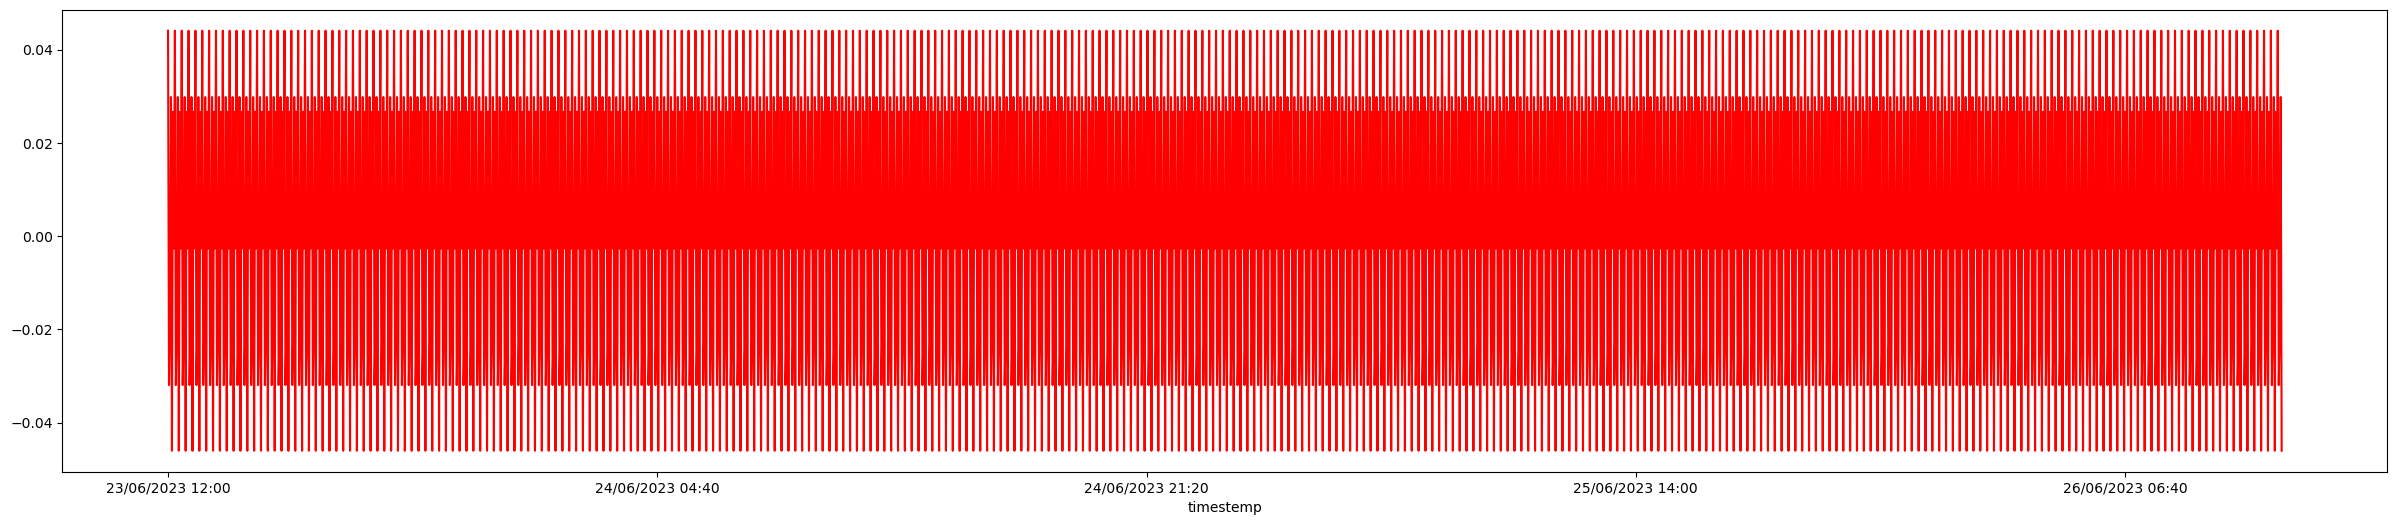

In [371]:
results.seasonal.plot(color="red", figsize=(30, 6))


<Axes: xlabel='timestemp'>

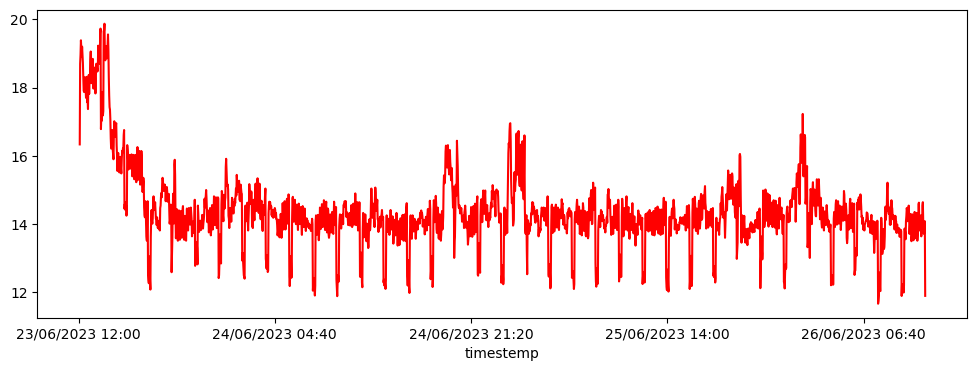

In [372]:
results.trend.plot(color="red", figsize=(12, 4))


<Axes: xlabel='timestemp'>

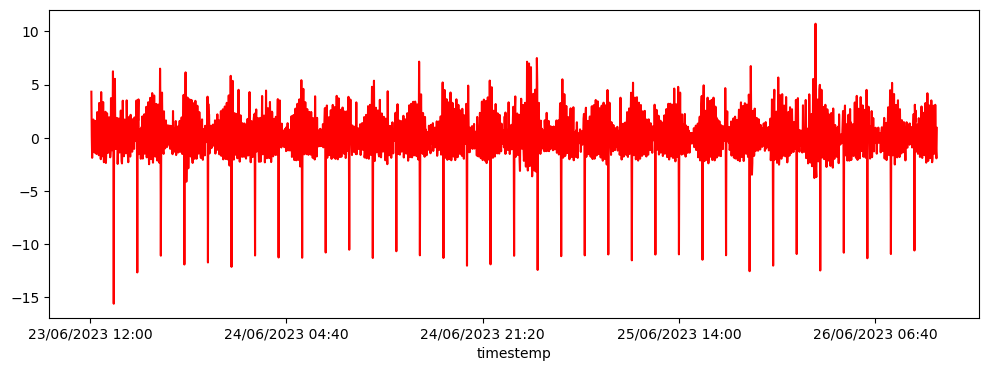

In [373]:
results.resid.plot(color="red", figsize=(12, 4))


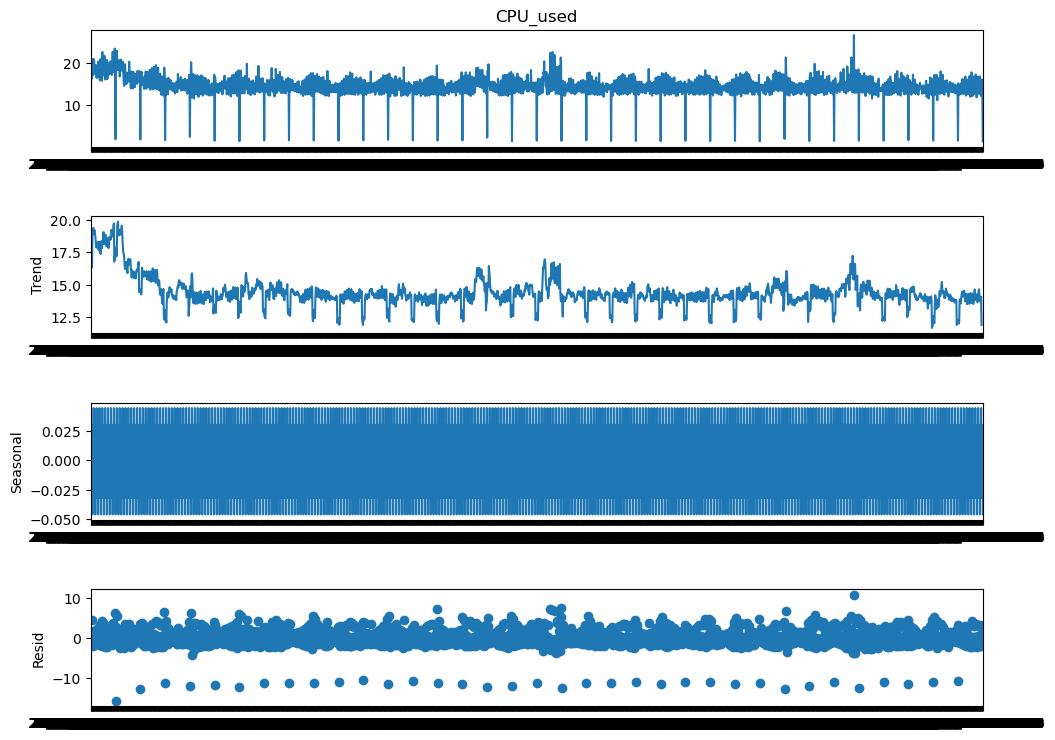

In [374]:
figure = results.plot()
figure.set_figwidth(12)
figure.set_figheight(8)



### Fitting a classifier MAD on residuals

In [375]:
 # Extract and reshape residuals
results = seasonal_decompose(df['CPU_used'], period=7)
residuals = results.resid
residuals = residuals.values.reshape(-1, 1)
# Fit MAD
mad = MAD().fit(residuals)
# Find the outliers
is_outlier = mad.labels_== 1
outliers = df[is_outlier]
print(len(outliers))

46


# Outlier classifier ensemble

#### Combination of two or more classifiers

In [376]:
from sklearn.preprocessing import QuantileTransformer
# Define the cols to be scaled
to_scale = ['CPU_used']

# Initiate the transformer
qt = QuantileTransformer(output_distribution="normal")
# Scale and store the columns back
df.loc[:, to_scale] = qt.fit_transform(df[to_scale])


In [377]:
 #start_date = pd.to_datetime('2023-07-06')
#end_date = pd.to_datetime('2023-07-14')
#sliced_df = df.loc[start_date:end_date]
#df.loc[start_date:end_date]

In [378]:
#7awel timestemp lil datime wmbaad aamel slicing bil code ili 9bal 

# LSTM autoencoders

In [379]:
df.index.values

array(['23/06/2023 12:00', '23/06/2023 12:02', '23/06/2023 12:04', ...,
       '26/06/2023 11:56', '26/06/2023 11:58', '26/06/2023 12:00'],
      dtype=object)

In [380]:
#df.index = pd.to_datetime(df.index)
#df.index

In [381]:

#train = df[:"2023-07-12"]
#test = df.loc["2023-07-12" :]
#train.shape, test.shape
#test

In [382]:
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)


(1620, 1) (541, 1)


In [383]:
train[['CPU_used']]

,CPU_used
timestemp,
23/06/2023 12:00,-2.244118
23/06/2023 12:02,1.918441
23/06/2023 12:04,0.993800
23/06/2023 12:06,2.456904
23/06/2023 12:08,1.918441
...,...
25/06/2023 17:50,0.127052
25/06/2023 17:52,0.051460
25/06/2023 17:54,-1.486537


### Data Scaling

In [384]:
scaler = StandardScaler()
scaler = scaler.fit(np.array(train['CPU_used']).reshape(-1,1))

train['CPU_used'] = scaler.transform(np.array(train['CPU_used']).reshape(-1,1))
test['CPU_used'] = scaler.transform(np.array(test['CPU_used']).reshape(-1,1))
test['CPU_used']

C:\Users\G701857\AppData\Local\Temp\ipykernel_1664\513648951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['CPU_used'] = scaler.transform(np.array(train['CPU_used']).reshape(-1,1))
C:\Users\G701857\AppData\Local\Temp\ipykernel_1664\513648951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['CPU_used'] = scaler.transform(np.array(test['CPU_used']).reshape(-1,1))


timestemp
25/06/2023 18:00   -3.111805
25/06/2023 18:02    0.161447
25/06/2023 18:04   -0.523960
25/06/2023 18:06    0.426461
25/06/2023 18:08   -0.138483
                      ...   
26/06/2023 11:52   -1.931248
26/06/2023 11:54   -1.114412
26/06/2023 11:56    0.903537
26/06/2023 11:58   -0.063705
26/06/2023 12:00   -5.190823
Name: CPU_used, Length: 541, dtype: float64

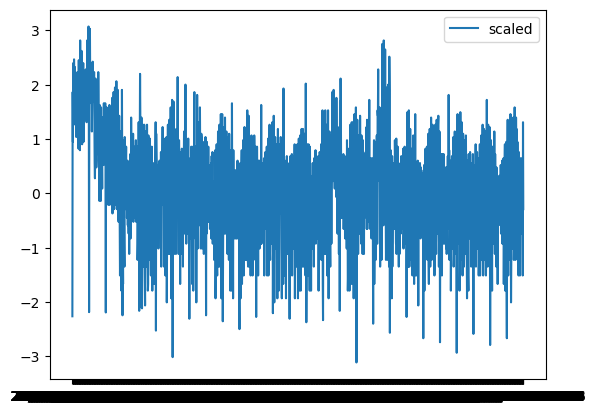

In [385]:
# Visualize scaled data
plt.plot(train['CPU_used'], label = 'scaled')
plt.legend()
plt.show()

###  create sequences
Create sequences combining TIME_STEPS contiguous data values from the training data.
TIME_STEP is set 7 as we want our network to have memory of 7 days

In [386]:
TIME_STEPS=10

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_out, y_out = [], []
    for i in range(len(X)-time_steps):
        X_out.append(X.iloc[i:(i+time_steps)].values)
        y_out.append(y.iloc[i+time_steps])
    
    return np.array(X_out), np.array(y_out)

X_train, y_train = create_sequences(train[['CPU_used']], train['CPU_used'])
X_test, y_test = create_sequences(test[['CPU_used']], test['CPU_used'])
print("Training input shape: ", X_train.shape)
print("Testing input shape: ", X_test.shape)

Training input shape:  (1610, 10, 1)
Testing input shape:  (531, 10, 1)


In [387]:
X_train

array([[[-2.26180829],
        [ 1.86384009],
        [ 0.94739758],
        ...,
        [ 1.72060198],
        [ 2.33045781],
        [ 1.98438695]],

       [[ 1.86384009],
        [ 0.94739758],
        [ 2.39752785],
        ...,
        [ 2.33045781],
        [ 1.98438695],
        [ 1.90457019]],

       [[ 0.94739758],
        [ 2.39752785],
        [ 1.86384009],
        ...,
        [ 1.98438695],
        [ 1.90457019],
        [ 1.35448872]],

       ...,

       [[-1.51094526],
        [ 0.64582471],
        [ 0.01341381],
        ...,
        [-0.21131407],
        [ 0.08833592],
        [ 0.01341381]],

       [[ 0.64582471],
        [ 0.01341381],
        [ 0.52167335],
        ...,
        [ 0.08833592],
        [ 0.01341381],
        [-1.51094526]],

       [[ 0.01341381],
        [ 0.52167335],
        [-0.21131407],
        ...,
        [ 0.01341381],
        [-1.51094526],
        [ 1.30927309]]])

In [388]:
X_test[]

SyntaxError: invalid syntax (3061316063.py, line 1)

In [389]:
# set seed to regenerate same sequence of random numbers. 
np.random.seed(21)
tf.random.set_seed(21)

In [390]:
model = Sequential()
model.add(LSTM(128, activation = 'tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, activation = 'tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 repeat_vector_17 (RepeatVe  (None, 10, 128)           0         
 ctor)                                                           
                                                                 
 lstm_35 (LSTM)              (None, 10, 128)           131584    
                                                                 
 dropout_35 (Dropout)        (None, 10, 128)           0         
                                                                 
 time_distributed_17 (TimeD  (None, 10, 1)             129       
 istributed)                                         

In [391]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)

Epoch 1/100
46/46 [==============================] - 6s 34ms/step - loss: 0.9462 - val_loss: 0.7921
Epoch 2/100
46/46 [==============================] - 1s 20ms/step - loss: 0.8588 - val_loss: 0.7992
Epoch 3/100
46/46 [==============================] - 1s 20ms/step - loss: 0.8632 - val_loss: 0.7923
Epoch 4/100
46/46 [==============================] - 1s 22ms/step - loss: 0.8181 - val_loss: 0.7841
Epoch 5/100
46/46 [==============================] - 1s 20ms/step - loss: 0.8201 - val_loss: 0.7851
Epoch 6/100
46/46 [==============================] - 1s 20ms/step - loss: 0.8688 - val_loss: 0.7857
Epoch 7/100
46/46 [==============================] - 1s 21ms/step - loss: 0.8008 - val_loss: 0.7815
Epoch 8/100
46/46 [==============================] - 1s 20ms/step - loss: 0.8009 - val_loss: 0.7820
Epoch 9/100
46/46 [==============================] - 1s 20ms/step - loss: 0.8001 - val_loss: 0.7810
Epoch 10/100
46/46 [==============================] - 1s 21ms/step - loss: 0.8019 - val_loss: 0.7830

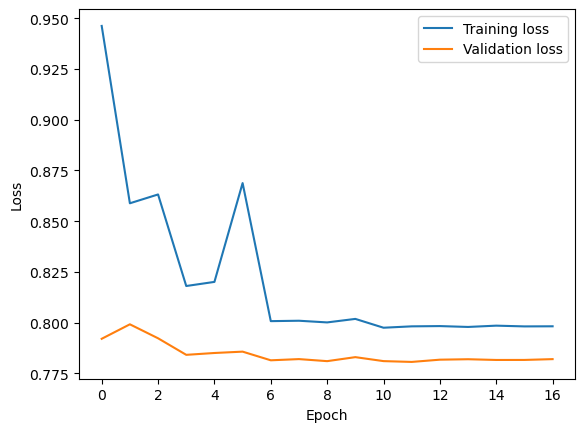

In [392]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

51/51 [==============================] - 1s 8ms/step
Train rmse: 0.8733272421898179
Reconstruction error threshold: 1.3739410344343814


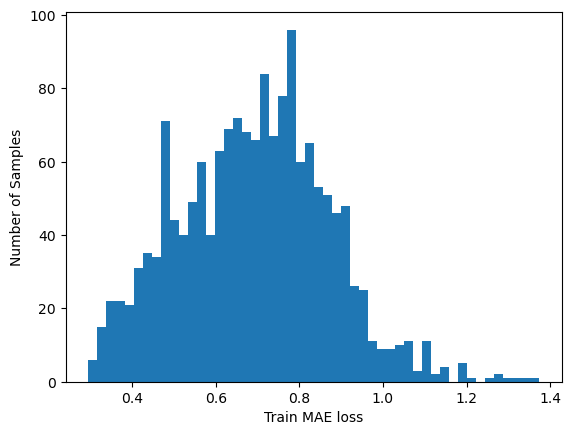

In [393]:
# Mean Absolute Error loss
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');
print('Train rmse:', np.sqrt(np.mean(np.power(X_train_pred - X_train,2))))
# Set reconstruction error threshold
threshold = np.max(train_mae_loss)

print('Reconstruction error threshold:',threshold)

17/17 [==============================] - 0s 10ms/step


1.4309416743839427

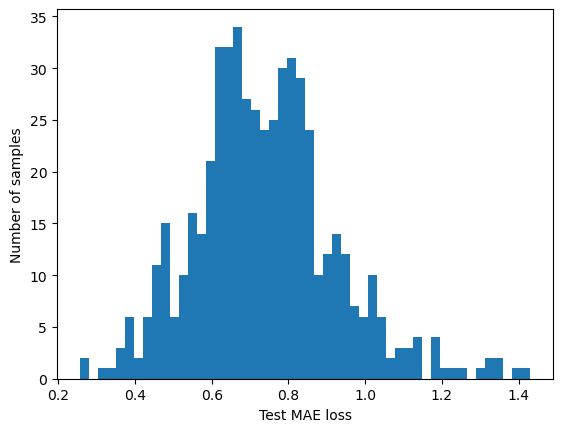

In [394]:
X_test_pred = model.predict(X_test, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)
# Set reconstruction error threshold
threshold = np.max(test_mae_loss)
plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

threshold 

In [395]:
print('Test rmse:', np.sqrt(np.mean(np.power(X_test_pred-X_test,2))))

Test rmse: 0.9267429680150929


In [396]:
#Lower MSE or MAE values indicate better reconstruction performance.

In [397]:
test[Timestrmp]

NameError: name 'Timestrmp' is not defined

In [398]:
threshold=1
anomaly_df = pd.DataFrame(test[TIME_STEPS:])
anomaly_df['loss'] = test_mae_loss
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] <= anomaly_df['threshold']
#anomaly_df['predicted']=anomaly_df['loss']+anomaly_df['CPU_used']?
#df
len(anomaly_df)

531

In [399]:
anomaly_df.head().index

Index(['25/06/2023 18:20', '25/06/2023 18:22', '25/06/2023 18:24',
       '25/06/2023 18:26', '25/06/2023 18:28'],
      dtype='object', name='timestemp')

In [400]:
X_test

array([[[-3.11180534],
        [ 0.16144744],
        [-0.52395974],
        ...,
        [-0.58667633],
        [ 0.42646109],
        [-1.11441196]],

       [[ 0.16144744],
        [-0.52395974],
        [ 0.42646109],
        ...,
        [ 0.42646109],
        [-1.11441196],
        [-0.92542653]],

       [[-0.52395974],
        [ 0.42646109],
        [-0.13848284],
        ...,
        [-1.11441196],
        [-0.92542653],
        [ 0.37571476]],

       ...,

       [[ 1.13886542],
        [ 0.08833592],
        [-0.92542653],
        ...,
        [-1.34781358],
        [-1.93124754],
        [-1.11441196]],

       [[ 0.08833592],
        [-0.92542653],
        [ 0.42646109],
        ...,
        [-1.93124754],
        [-1.11441196],
        [ 0.9035374 ]],

       [[-0.92542653],
        [ 0.42646109],
        [-1.22416724],
        ...,
        [-1.11441196],
        [ 0.9035374 ],
        [-0.06370525]]])

In [401]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies


,CPU_used,loss,threshold,anomaly
timestemp,,,,
25/06/2023 18:20,-0.925427,0.682435,1,True
25/06/2023 18:22,0.375715,0.455029,1,True
25/06/2023 18:24,-0.290232,0.483082,1,True
25/06/2023 18:26,0.685815,0.452842,1,True
25/06/2023 18:28,-1.510945,0.482392,1,True
...,...,...,...,...
26/06/2023 11:52,-1.931248,0.863303,1,True
26/06/2023 11:54,-1.114412,0.881906,1,True
26/06/2023 11:56,0.903537,0.919632,1,True


In [402]:
len(anomalies)

484

In [403]:
print('ratio of corrected predicted ',(len(anomalies)/len(anomaly_df))*100,'%')

ratio of corrected predicted  91.1487758945386 %


# Gongrats the model predicted well on unseen  normal data 

let's check Unclassified Data with anomalies if the model Could detect anomalies

In [473]:
df_ano=pd.read_csv('Anomaly_CPU_M2M_3D.csv',sep=';')
len(df_ano)

865

In [474]:
df_ano

,Time,CPU Used
0,07/07/2023 00:00,1.87
1,07/07/2023 00:05,23.20
2,07/07/2023 00:10,28.40
3,07/07/2023 00:15,19.20
4,07/07/2023 00:20,19.10
...,...,...
860,09/07/2023 23:40,33.50
861,09/07/2023 23:45,36.10
862,09/07/2023 23:50,37.20
863,09/07/2023 23:55,31.50


In [475]:
df_ano.set_index("Time", inplace=True)
df_ano.head()

,CPU Used
Time,
07/07/2023 00:00,1.87
07/07/2023 00:05,23.20
07/07/2023 00:10,28.40
07/07/2023 00:15,19.20
07/07/2023 00:20,19.10


In [476]:
test_size = len(df_ano) 
test =  df_ano.iloc[:]
print(test.shape)
df_ano=test
df_ano

(865, 1)


,CPU Used
Time,
07/07/2023 00:00,1.87
07/07/2023 00:05,23.20
07/07/2023 00:10,28.40
07/07/2023 00:15,19.20
07/07/2023 00:20,19.10
...,...
09/07/2023 23:40,33.50
09/07/2023 23:45,36.10
09/07/2023 23:50,37.20


In [479]:
scaler = StandardScaler()
scaler = scaler.fit(np.array(df_ano['CPU Used']).reshape(-1,1))


test['CPU Used'] = scaler.transform(np.array(df_ano['CPU Used']).reshape(-1,1))
test['CPU Used']

Time
07/07/2023 00:00   -2.612671
07/07/2023 00:05   -0.448720
07/07/2023 00:10    0.078826
07/07/2023 00:15   -0.854524
07/07/2023 00:20   -0.864669
                      ...   
09/07/2023 23:40    0.596226
09/07/2023 23:45    0.859999
09/07/2023 23:50    0.971595
09/07/2023 23:55    0.393324
10/07/2023 00:00   -2.649193
Name: CPU Used, Length: 865, dtype: float64

In [480]:
TIME_STEPS=10

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_out, y_out = [], []
    for i in range(len(X)-time_steps):
        X_out.append(X.iloc[i:(i+time_steps)].values)
        y_out.append(y.iloc[i+time_steps])
    
    return np.array(X_out), np.array(y_out)

#X_train, y_train = create_sequences(train[['CPU_used']], train['CPU_used'])
X_test_ano, y_test_ano = create_sequences( test[['CPU Used']],  test[['CPU Used']])
#print("Training input shape: ", X_train.shape)
print("Testing input shape: ", X_test_ano.shape)
test_unclassified=X_test_ano[:]
test_unclassified.shape

Testing input shape:  (855, 10, 1)


(855, 10, 1)

In [481]:
X_test_pred = model.predict(test_unclassified, verbose=1)


X_test_pred.shape

27/27 [==============================] - 0s 8ms/step


(855, 10, 1)

Reconstruction error threshold: 2.7227887437345415


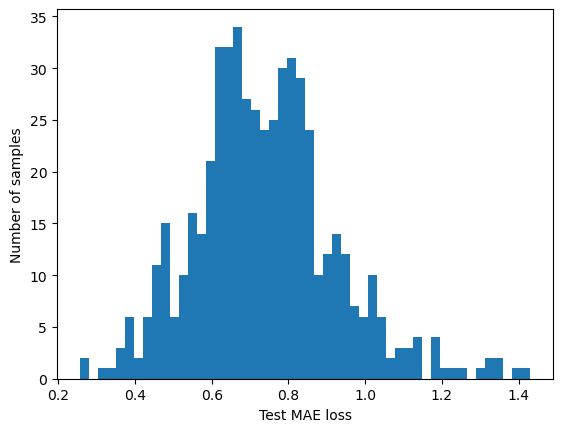

In [482]:
test_mae_loss_ano = np.mean(np.abs(X_test_pred-test_unclassified), axis=1)
# Set reconstruction error threshold
threshold = np.max(test_mae_loss)
plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

# Set reconstruction error threshold
threshold = np.max(test_mae_loss_ano)

print('Reconstruction error threshold:',threshold)

In [541]:


threshold=1
anomaly_df = pd.DataFrame(df_ano[TIME_STEPS:])
anomaly_df['loss'] = test_mae_loss_ano
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] >= anomaly_df['threshold']

anomaly_df




,CPU Used,loss,threshold,anomaly
Time,,,,
07/07/2023 00:50,-0.195092,0.461809,1,False
07/07/2023 00:55,-0.945830,0.257317,1,False
07/07/2023 01:00,-0.022625,0.285064,1,False
07/07/2023 01:05,-0.590751,0.285714,1,False
07/07/2023 01:10,0.342598,0.261439,1,False
...,...,...,...,...
09/07/2023 23:40,0.596226,0.221351,1,False
09/07/2023 23:45,0.859999,0.216645,1,False
09/07/2023 23:50,0.971595,0.211280,1,False


In [542]:
len(anomaly_df)

855

In [543]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies
len(anomalies)
print(f'ratio of corrected predicted anomalies',(100-(len(anomalies)/len(anomaly_df))*100),'%')

ratio of corrected predicted anomalies 94.26900584795321 %


In [544]:
len(anomalies)

49

In [545]:
anomalies_df=pd.DataFrame(anomalies)
anomalies_df

,CPU Used,loss,threshold,anomaly
Time,,,,
07/07/2023 15:05,-2.617743,1.089481,1,True
07/07/2023 15:10,-2.621801,1.312686,1,True
07/07/2023 15:15,-2.634990,1.440012,1,True
07/07/2023 15:20,-2.609627,1.608158,1,True
07/07/2023 15:25,-2.594409,1.822189,1,True
07/07/2023 15:30,-2.627888,1.994975,1,True
07/07/2023 15:35,-2.603540,2.139914,1,True
07/07/2023 15:40,-2.581221,2.139786,1,True
07/07/2023 15:45,-2.061791,2.137393,1,True


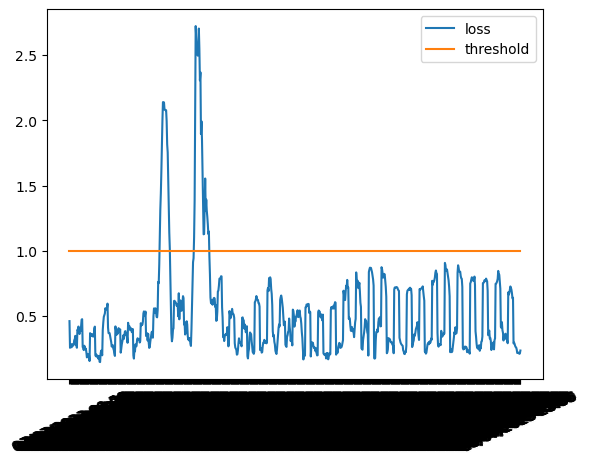

In [546]:
plt.plot(anomaly_df.index, anomaly_df.loss, label='loss')
plt.plot(anomaly_df.index, anomaly_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend()

In [547]:
import seaborn as sns

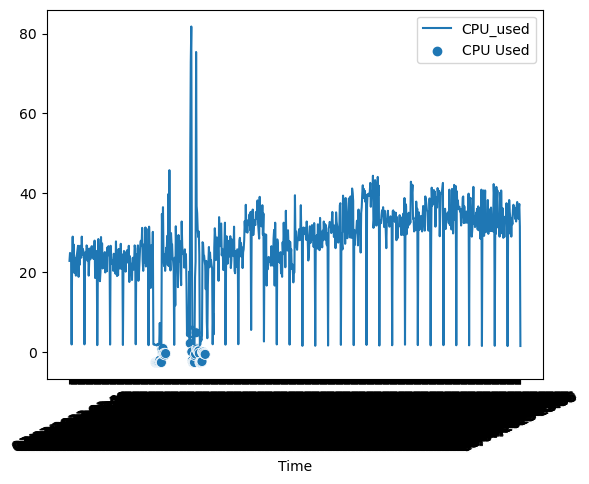

In [548]:
plt.plot(anomaly_df[TIME_STEPS:].index, 
         
  scaler.inverse_transform(np.array(anomaly_df[TIME_STEPS:]['CPU Used']).reshape(-1,1)), 
  label='CPU_used'
)
sns.scatterplot(anomalies[['CPU Used']], color=sns.color_palette()[3],s=52)
plt.xticks(rotation=25)
plt.legend();




In [540]:
plt.plot(
 anomaly_df[TIME_STEPS:].index, 
  scaler.inverse_transform(np.array(anomaly_df[TIME_STEPS:]['CPU_used']).reshape(-1,1)), 
  label='cpu used'
);

sns.scatterplot(
  
  anomalies[['CPU_used']],
  color=sns.color_palette()[3],
  s=52,
  
)
plt.xticks(rotation=25)
plt.legend();

KeyError: 'CPU_used'

In [217]:
threshold=1.5
anomaly_df = pd.DataFrame(test[TIME_STEPS:])
anomaly_df['loss'] = test_mae_loss
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']

In [ ]:
anomaly_df

In [ ]:
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

#conf_matrix =  roc_auc_score(X_test,X_test_pred)

#precision = precision_score(X_test,X_test_pred)
#recall = recall_score(X_test,X_test_pred)
#f1 = f1_score(X_test,X_test_pred)
# Accuracy: 99.84%
# Precision: 40.00%
# Recall: 64.29%

In [ ]:
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [154]:
#precision = precision_score(test['CPU_used'],X_test_pred)

In [155]:
#X_test

In [156]:
#X_test_pred

In [157]:
#test['CPU_used'][TIME_STEPS:]

In [158]:
#anomaly_df['CPU_used']

In [159]:
#chouf kifeh evaluation mtaa unsupervised anomaly detction kima autoencoders w chouf zeda kifeh tevalue iforest w abbda e5dem modele e5er ala time series metek w esel

In [160]:
# Assuming you have already calculated the reconstruction error (mse) and added the 'anomaly' column to the DataFrame

# True positive (TP) is when both the true label and predicted label are anomalies
tp = df[(df['anomaly'] == 1) & (df['true_label'] == 1)].shape[0]

# False positive (FP) is when the predicted label is an anomaly, but the true label is not
fp = df[(df['anomaly'] == 1) & (df['true_label'] == 0)].shape[0]

# True negative (TN) is when both the true label and predicted label are not anomalies
tn = df[(df['anomaly'] == 0) & (df['true_label'] == 0)].shape[0]

# False negative (FN) is when the predicted label is not an anomaly, but the true label is
fn = df[(df['anomaly'] == 0) & (df['true_label'] == 1)].shape[0]

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall (sensitivity)
recall = tp / (tp + fn)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-Score:", f1_score)


KeyError: 'anomaly'